<table style="width:100%;"/>
    <tr>
        <td style="width:80%; text-align:left; vertical-align: center;"/>
            <img src="Figures/Logo_Combined.png" width="350" alt="logo" align="left"/>
        </td/>
        <td style="width:20%; text-align:left; vertical-align: top;"/>
            Biochemical Engineering Lab<br/>
            & Janssen Cilag AG<br/>
        </td/>
    </tr/>
</table/>

<center> 
    <h1>Master Thesis on Protein Aggregation: DLS + MDI Analysis </h1>
    <h3>by Eduard Meier</h3><br/>
</center>

Before trying to run this jupyter notebook, please make sure that your computer is running python 3 and that the libaries imported below are all installed, e.g. typing the following code in your terminal: ```pip install numpy``` (repeat for all other libraries)

To be able to see the interactive widgets in this notebook, you need to enable the widgets package by executing the following code in your terminal: ```jupyter nbextension enable --py widgetsnbextension```

The widgets don't work reliably when using the Jupyter Notebook with Visual Studio Code, preferably open the Jupyter Notebook in your default browser.

## Import relevant libraries/modules

In [1]:
# Import python libraries used in the following

# Public
import numpy as np                            # Import numerical python library
import matplotlib as mpl                      # Import python mathematical plotting library
import matplotlib.pyplot as plt               # Import python mathematical plotting library
import pandas as pd                           # Import python data analysis library
import pathlib                                # Import library to edit paths
import math                                   # Import math library
import glob                                   # Import library to scan paths
import os                                     # Import library to interact with os
import io                                     # Import library to interact with io
import sys                                    # Import system library
import time                                   # Import library for time tracking
import ipywidgets as widgets                  # Import libary for jupyter notebook widgets
from IPython.display import Javascript, HTML, Image, display, Markdown, clear_output
from pptx import Presentation                 # Import libary for microsoft powerpoint
from pptx.util import Inches                  # Import inches function to set sizes/margins
from itertools import zip_longest             # Import iteration tool


# Own modules (meiered)
sys.path.append(r'../04_Code')                # Add "Modules" subdirectory to system paths
import jupyterWidgets as jw                   # Import jupyterWidgets module (based on ipywidgets)
import jupyterData as jd                      # Import jupyterData module
import jupyterPlot as jp                      # Import jupyterPlot module

# Set path to parent directory
os.chdir('..')

## Hide Code

Source: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

In [2]:
# Set parameter to hide code (after changing to 0, page needs to be refreshed in order to work)
hideCode = 1

if hideCode:
    file = os.path.join('04_Code', 'hideCode.html')
    display(HTML(filename=file))

## Adjust Settings

In [3]:
# Create and display checkboxes
[boxPlot, widget_plotDLS, widget_plotMDI, widget_onlyOverview] = jw.plotWidget()

# Display checkbox
display(boxPlot)

# Create and display widgets to set default values
output = jw.defaultWidgets()

# Extract variables from output list
[box, widget_showTitle, widget_cmap, widget_invert, widget_font, widget_fontSize] = output

# Display widget box
display(box)

# Create and display button to "Run all cells below"
button = jw.runAllWidget()

# Display button
display(button)

Please decide what results shall be plotted:


Please select the settings for plots:
(Recommended font size is 12 for documents and 18 for presentations)



Finally, press "Run all cells below" button below!


Button(description='Run all cells below', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [4]:
input('Press Enter')
print('Thanks!\n')

class StopExecution(Exception):
    def _render_traceback_(self):
        pass
    
print('Now select plot settings above and then press the "Run all cells below" button!\n')


raise StopExecution

Press Enter
Thanks!

Now select plot settings above and then press the "Run all cells below" button!



#### The following settings from above have been registered ↓

In [5]:
# Save selected values
plotDLS = widget_plotDLS.value
plotMDI = widget_plotMDI.value
onlyOverview = widget_onlyOverview.value
showTitle = widget_showTitle.value
cmap = widget_cmap.value
invert = widget_invert.value
font = widget_font.value
fontSize = int(widget_fontSize.value)

# Save the default values selected above
cmap = jw.setDefault(onlyOverview, showTitle, cmap, invert, font, fontSize)

Plot:       everything
Title:      True
Colormap:   coolwarm_r
Font:       LaTeX
Fontsize:   15


# 1. Dynamic Light Scattering (DLS)

## 1.1 Folder and File Detection

Detect folders and contained data, import data and merge same experiment. Merged (+ averaged) data is additionally exported in the CSV format.

### 1.1.1 Set Path to DLS Data Folders
This part might have to be adapted depending on the location of the data (relative to location of jupyter notebook file).

In [6]:
# Set path of DLS data folders
pathsDLS = glob.glob(os.path.join('01_Data', '01_DLS', '01_Raw', '*'))

### 1.1.2 Scan Folders

In [7]:
# Scan the given folders
output = jd.scanFolders(pathsDLS)

# Extract variables from output list
[foldersDLS, csvFilesDLS] = output

The following folders have been detected: 
 
 ['01_Reference', '02_Time_Series', '03_Surfactant', '04_Protein', '05_Concentration', '06_Air', 'xx_unused'] 

The CSV-files of each folder are stored in the dictionary "csvFiles"! 

Note: The corresponding foldername serves as a key, i.e. csvFiles[folder] = "CSV files inside folder". 



### 1.1.3 Extract Data

In [8]:
# Extract data from the csv-files
output = jd.extractDataDLS(foldersDLS, csvFilesDLS)

# Extract variables from output list
[allFilesDLS, corrData, intData] = output

The correlation and intensity data from the CSV-files are stored in the dictionaries "corrData" and "intData" 

with respective filenames as keys, i.e. corrData[filename] = "correlation data inside given file"! 



### 1.1.4 Merge Experimental Data

In [9]:
# Merge data from the csv-files
output = jd.mergeDataDLS(allFilesDLS, corrData, intData)

# Extract variables from output list
[corrData, intData, collFilesDLS] = output

The following collections of same experimental conditions are generated (with different suffixes): 

H2O_00mg_000rpm_00-00min_NA
H2O_00mg_000rpm_10-00min_PM
H2O_00mg_000rpm_10-00min_ST
H2O_00mg_200rpm_10-00min_PM
H2O_00mg_200rpm_10-00min_ST
H2O_00mg_PO1_500ug_000rpm_00-00min_NA
H2O_00mg_PS2_500ug_000rpm_00-00min_NA
H2O_00mg_PS8_500ug_000rpm_00-00min_NA
JJ1_01mg_000rpm_00-00min_NA
JJ1_01mg_000rpm_10-00min_PM
JJ1_01mg_000rpm_10-00min_ST
JJ1_01mg_200rpm_10-00min_PM
JJ1_01mg_200rpm_10-00min_ST
JJ1_01mg_AIR_010%v_200rpm_10-00min_PM
JJ1_01mg_BRJ_500ug_000rpm_00-00min_NA
JJ1_01mg_PO1_010ug_000rpm_00-00min_NA
JJ1_01mg_PO1_010ug_200rpm_10-00min_PM
JJ1_01mg_PO1_010ug_200rpm_10-00min_ST
JJ1_01mg_PO1_050ug_000rpm_00-00min_NA
JJ1_01mg_PO1_050ug_200rpm_10-00min_PM
JJ1_01mg_PO1_050ug_200rpm_10-00min_ST
JJ1_01mg_PO1_100ug_000rpm_00-00min_NA
JJ1_01mg_PO1_100ug_200rpm_10-00min_PM
JJ1_01mg_PO1_100ug_200rpm_10-00min_ST
JJ1_01mg_PO1_250ug_200rpm_10-00min_PM
JJ1_01mg_PO1_250ug_200rpm_10-00min_ST
JJ1_01mg_PO

# 2. Microflow Digital Imaging (MDI)

## 2.1 Folder and File Detection

Detect folders and contained data, import data and merge same experiment. Merged (+ averaged) data is additionally exported in the CSV format.

### 2.1.1 Set Path to MDI Data Folders
This part might have to be adapted depending on the location of the data (relative to location of jupyter notebook file).

In [10]:
# Set path of MDI data folders
pathsMDI = glob.glob(os.path.join('01_Data', '02_MDI', '01_Raw', '*'))

### 2.1.2 Scan Folders

In [11]:
# Scan the given folders
output = jd.scanFolders(pathsMDI)

# Extract variables from output list
[foldersMDI, csvFilesMDI] = output

The following folders have been detected: 
 
 ['01_Reference', '02_Time_Series', '03_Surfactant', '04_Protein', '05_Concentration', '06_Air', 'xx_unused'] 

The CSV-files of each folder are stored in the dictionary "csvFiles"! 

Note: The corresponding foldername serves as a key, i.e. csvFiles[folder] = "CSV files inside folder". 



### 2.1.3 Extract Data

In [12]:
# Extract data from the csv-files
output = jd.extractDataMDI(foldersMDI, csvFilesMDI)

# Extract variables from output list
[allFilesMDI, countData] = output

The correlation and intensity data from the CSV-files are stored in the dictionaries "corrData" and "intData" 

with respective filenames as keys, i.e. corrData[filename] = "correlation data inside given file"! 



### 2.1.4 Merge Experimental Data

In [13]:
# Merge data from the csv-files
output = jd.mergeDataMDI(allFilesMDI, countData)

# Extract variables from output list
[countData, collFilesMDI] = output

The following collections of same experimental conditions are generated (with different suffixes): 

H2O_00mg_000rpm_00-00min_NA
H2O_00mg_200rpm_10-00min_PM
H2O_00mg_200rpm_10-00min_ST
JJ1_01mg_000rpm_00-00min_NA
JJ1_01mg_000rpm_10-00min_PM
JJ1_01mg_000rpm_10-00min_ST
JJ1_01mg_200rpm_10-00min_PM
JJ1_01mg_200rpm_10-00min_ST
JJ1_01mg_AIR_010%v_200rpm_10-00min_PM
JJ1_01mg_PO1_010ug_200rpm_10-00min_PM
JJ1_01mg_PO1_010ug_200rpm_10-00min_ST
JJ1_01mg_PO1_050ug_200rpm_10-00min_PA
JJ1_01mg_PO1_050ug_200rpm_10-00min_PM
JJ1_01mg_PO1_050ug_200rpm_10-00min_ST
JJ1_01mg_PO1_100ug_200rpm_10-00min_PM
JJ1_01mg_PO1_100ug_200rpm_10-00min_ST
JJ1_01mg_PO1_250ug_200rpm_10-00min_PM
JJ1_01mg_PO1_250ug_200rpm_10-00min_ST
JJ1_01mg_PO1_500ug_000rpm_00-00min_NA
JJ1_01mg_PO1_500ug_200rpm_10-00min_PM
JJ1_01mg_PO1_500ug_200rpm_10-00min_ST
JJ1_01mg_PS2_010ug_200rpm_10-00min_PM
JJ1_01mg_PS2_010ug_200rpm_10-00min_ST
JJ1_01mg_PS2_050ug_200rpm_10-00min_PM
JJ1_01mg_PS2_050ug_200rpm_10-00min_ST
JJ1_01mg_PS2_100ug_200rpm_10-

#### Correction for Surface Abrasion

##### UNDER CONSTRUCTION

In [14]:
"""
for collFile in collFilesMDI:
            
    prot = collFile[0:3]
    rpm = collFile[-18:-15]
    mat = collFile[-2:]

    if prot != 'H2O' and mat == 'PM' and rpm != '000':

        for col in range(countData[collFile].shape[1]):
            countData[collFile][:,col] = np.subtract(countData[collFile][:,col], np.mean(countData['H2O_00mg_200rpm_10-00min_PM'], axis=1))

    elif prot != 'H2O' and mat == 'ST' and rpm != '000':

        for col in range(countData[collFile].shape[1]):
            countData[collFile][:,col] = np.subtract(countData[collFile][:,col], np.mean(countData['H2O_00mg_200rpm_10-00min_ST'], axis=1))

    else:
        print(collFile)
"""

"\nfor collFile in collFilesMDI:\n            \n    prot = collFile[0:3]\n    rpm = collFile[-18:-15]\n    mat = collFile[-2:]\n\n    if prot != 'H2O' and mat == 'PM' and rpm != '000':\n\n        for col in range(countData[collFile].shape[1]):\n            countData[collFile][:,col] = np.subtract(countData[collFile][:,col], np.mean(countData['H2O_00mg_200rpm_10-00min_PM'], axis=1))\n\n    elif prot != 'H2O' and mat == 'ST' and rpm != '000':\n\n        for col in range(countData[collFile].shape[1]):\n            countData[collFile][:,col] = np.subtract(countData[collFile][:,col], np.mean(countData['H2O_00mg_200rpm_10-00min_ST'], axis=1))\n\n    else:\n        print(collFile)\n"

# 3. Data Visualization (of DLS & MDI Data)

## 3.1 Automatized Plotting

#### Remove old auto plots (.png)

In [15]:
if plotDLS and not onlyOverview:

    plotsCollDLS = glob.glob(os.path.join('02_Plots', 'DLS', 'Collection', 'PNG', '*.png'))
    plotsAvgDLS = glob.glob(os.path.join('02_Plots', 'DLS', 'Average', 'PNG', '*.png'))

    for plotCollDLS, plotAvgDLS in zip(plotsCollDLS, plotsAvgDLS):

        os.remove(plotCollDLS)
        os.remove(plotAvgDLS)
                
if plotMDI and not onlyOverview:
    
    plotsCollLinMDI = glob.glob(os.path.join('02_Plots', 'MDI', 'Collection', 'Linear', 'PNG', '*.png'))
    plotsAvgLinMDI = glob.glob(os.path.join('02_Plots', 'MDI', 'Average', 'Linear', 'PNG', '*.png'))
    
    plotsCollLogMDI = glob.glob(os.path.join('02_Plots', 'MDI', 'Collection', 'Log', 'PNG', '*.png'))
    plotsAvgLogMDI = glob.glob(os.path.join('02_Plots', 'MDI', 'Average', 'Log', 'PNG', '*.png'))

    for plotCollLinMDI, plotAvgLinMDI in zip(plotsCollLinMDI, plotsAvgLinMDI):

        os.remove(plotCollLinMDI)
        os.remove(plotAvgLinMDI)

    for plotCollLogMDI, plotAvgLogMDI in zip(plotsCollLogMDI, plotsAvgLogMDI):

        os.remove(plotCollLogMDI)
        os.remove(plotAvgLogMDI)
    
    
if (plotDLS or plotMDI) and not onlyOverview:
    print('All old plots have been deleted.')

All old plots have been deleted.


#### DLS ↓ 

In [16]:
if plotDLS and not onlyOverview:
    
    # Set plotting parameters
    plotAverage = [0, 1]
    
    param = []
    
    for avg in plotAverage:
    
        # Set parameter lists containing plotting parameters
        # param = [autoPlot, plotIntensity, plotAverage, plotNumberOfExp, plotFileName, 
        #         plotTitle, plotLegend, colors, cmap, font, showTitle]
        param.append([1, 1, avg, 1, '', '', [], [0], cmap, font, showTitle])

    numCollFilesDLS = len(collFilesDLS)
    
    # Create instance of progress bar
    progBar = widgets.IntProgress(min=0, max=numCollFilesDLS)
    
    print('Plotting and saving all collection and average plots (saved as .PDF and .PNG files): \n')
        
    # Display progress bar
    display(progBar)
    
    for fileName in collFilesDLS:
        
        # Increment progress value
        progBar.value += 1
        
        for i in range(len(plotAverage)):
            # Call plotting function
            jp.plotDLS(corrData, intData, [fileName], param[i])

Plotting and saving all collection and average plots (saved as .PDF and .PNG files): 



IntProgress(value=0, max=84)

#### MDI ↓ 

In [17]:
if plotMDI and not onlyOverview: 

    # Set plotting parameters
    plotLimits = [0, [10, 1e9]]
    logPlot = [0, 1]
    rmFirstBin = [1, 0]
    plotAverage = [0, 1]
    
    param = []
    
    for i, log in enumerate(logPlot):
        for avg in plotAverage:
            
            if log:
                # Set parameter lists containing plotting parameters
                # param = [autoPlot, rmFirstBin, logPlot, plotAverage, plotLimits, expNames, plotFileName, 
                #          plotTitle, colors, cmap, font, showTitle]
                param.append([1, 0, log, avg, plotLimits[i], [0], '', '', [0], cmap, font, showTitle])
            else:
                for rm in rmFirstBin:
                    # Set parameter lists containing plotting parameters
                    # param = [autoPlot, rmFirstBin, logPlot, plotAverage, plotLimits, expNames, plotFileName, 
                    #          plotTitle, colors, cmap, font, showTitle]
                    param.append([1, rm, log, avg, plotLimits[i], [0], '', '', [0], cmap, font, showTitle])
     
    numCollFilesMDI = len(collFilesMDI)
    
    # Create instance of progress bar
    progBar = widgets.IntProgress(min=0, max=numCollFilesMDI) # instantiate the bar
    
    print('Plotting and saving all collection and average plots (saved as .PDF and .PNG files): \n')
    
    # Display progress bar
    display(progBar)
    
    for fileName in collFilesMDI:

        # Increment progress value
        progBar.value += 1
        
        # Call plotting function
        for i in range(len(logPlot) + len(plotAverage) + len(rmFirstBin)-1):
            jp.plotMDI(countData, [fileName], param[i])

Plotting and saving all collection and average plots (saved as .PDF and .PNG files): 



IntProgress(value=0, max=63)

#### Plot Example ↓

In [18]:
"""
if not onlyOverview:

    plotListDLS = []
    plotListMDI = []

    # Create list of all plots

    for plotName in glob.glob(os.path.join('.', '02_Plots', 'DLS', 'Collection', 'PNG', '*.png')):
        plotListDLS.append(plotName)
        plotListDLS = sorted(plotListDLS)

    for plotName in glob.glob(os.path.join('.', '02_Plots', 'MDI', 'Collection', 'Linear', 'PNG', '*.png')):
        plotListMDI.append(plotName)
        plotListMDI = sorted(plotListMDI)

    # Display an example plot for both measurement techniques
    print('DLS Example Plot:')
    display(Image(filename=plotListDLS[12], width=800))
    print('MDI Example Plot:')
    display(Image(filename=plotListMDI[8], width=600))
"""

"\nif not onlyOverview:\n\n    plotListDLS = []\n    plotListMDI = []\n\n    # Create list of all plots\n\n    for plotName in glob.glob(os.path.join('.', '02_Plots', 'DLS', 'Collection', 'PNG', '*.png')):\n        plotListDLS.append(plotName)\n        plotListDLS = sorted(plotListDLS)\n\n    for plotName in glob.glob(os.path.join('.', '02_Plots', 'MDI', 'Collection', 'Linear', 'PNG', '*.png')):\n        plotListMDI.append(plotName)\n        plotListMDI = sorted(plotListMDI)\n\n    # Display an example plot for both measurement techniques\n    print('DLS Example Plot:')\n    display(Image(filename=plotListDLS[12], width=800))\n    print('MDI Example Plot:')\n    display(Image(filename=plotListMDI[8], width=600))\n"

## 3.2 Manual Plotting

#### Remove old overview plots (.png)

In [19]:
if plotDLS:

    plotsOverviewDLS = glob.glob(os.path.join('02_Plots', 'DLS', 'Overview', 'PNG', '*.png'))

    for plotOverviewDLS in plotsOverviewDLS:

        os.remove(plotOverviewDLS)

if plotMDI:
    
    plotsOverviewLinMDI = glob.glob(os.path.join('02_Plots', 'MDI', 'Overview', 'Linear', 'PNG', '*.png'))
    plotsOverviewLogMDI = glob.glob(os.path.join('02_Plots', 'MDI', 'Overview', 'Log', 'PNG', '*.png'))
        
    for plotOverviewLinMDI in plotsOverviewLinMDI:

        os.remove(plotOverviewLinMDI)

    for plotOverviewLogMDI in plotsOverviewLogMDI:

        os.remove(plotOverviewLogMDI)
    
if plotDLS or plotMDI:
    print('All old plots have been deleted.')

All old plots have been deleted.


### Background

#### DLS ↓ 

In [20]:
if plotDLS:
        
    fileNames = ['H2O_00mg_000rpm_00-00min_NA', 'H2O_00mg_000rpm_10-00min_PM', 'H2O_00mg_200rpm_10-00min_PM',
                 'JJ1_01mg_000rpm_00-00min_NA', 'JJ1_01mg_000rpm_10-00min_PM', 'JJ1_01mg_200rpm_10-00min_PM']
    
    plotLegend = ['MQW, Direct', 'MQW, Inserted', 'MQW, Sheared', 
                  'JJ1, Direct', 'JJ1, Inserted', 'JJ1, Sheared']

    plotName = 'JJ1_01mg_BGr_PM'
    
    plotTitle = 'JJmAb1 (1 mg/mL), Background, PMMA'

    print('Plotting and saving plot (saved as .PDF and .PNG files): \n')

    print(plotName)

    # Set parameter lists containing plotting parameters
    # param = [autoPlot, plotIntensity, plotAverage, plotNumberOfExp, plotFileName, 
    #          plotTitle, plotLegend, colors, cmap, font, showTitle]
    param = [0, 0, 1, 0, plotName, plotTitle, plotLegend, [0], cmap, font, showTitle]
    
    # Call plotting function
    jp.plotDLS(corrData, intData, fileNames, param)

Plotting and saving plot (saved as .PDF and .PNG files): 

JJ1_01mg_BGr_PM


In [21]:
if plotDLS:
        
    fileNames = ['H2O_00mg_000rpm_00-00min_NA', 'H2O_00mg_000rpm_10-00min_ST', 'H2O_00mg_200rpm_10-00min_ST',
                 'JJ1_01mg_000rpm_00-00min_NA', 'JJ1_01mg_000rpm_10-00min_ST', 'JJ1_01mg_200rpm_10-00min_ST']
    
    plotLegend = ['MQW, Direct', 'MQW, Inserted', 'MQW, Sheared', 
                  'JJ1, Direct', 'JJ1, Inserted', 'JJ1, Sheared']

    plotName = 'JJ1_01mg_BGr_ST'
    
    plotTitle = 'JJmAb1 (1 mg/mL), Background, Steel'

    print('Plotting and saving plot (saved as .PDF and .PNG files): \n')

    print(plotName)

    # Set parameter lists containing plotting parameters
    # param = [autoPlot, plotIntensity, plotAverage, plotNumberOfExp, plotFileName, 
    #          plotTitle, plotLegend, colors, cmap, font, showTitle]
    param = [0, 0, 1, 0, plotName, plotTitle, plotLegend, [0], cmap, font, showTitle]
    
    # Call plotting function
    jp.plotDLS(corrData, intData, fileNames, param)

Plotting and saving plot (saved as .PDF and .PNG files): 

JJ1_01mg_BGr_ST


#### MDI ↓ 

In [22]:
if plotMDI:
    
    fileNames = ['H2O_00mg_000rpm_00-00min_NA', 'H2O_00mg_200rpm_10-00min_PM',
                 'JJ1_01mg_000rpm_00-00min_NA', 'JJ1_01mg_000rpm_10-00min_PM', 'JJ1_01mg_200rpm_10-00min_PM']
    
    expNames = ['MQW, Direct', 'MQW, Sheared', 
                  'JJ1, Direct', 'JJ1, Inserted', 'JJ1, Sheared']
    
    plotName = 'JJ1_01mg_BGr_PM'

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    plotTitle = 'JJmAb1 (1 mg/mL), Background, PMMA'

    print(plotName)

    # Set parameter lists containing plotting parameters
    # param = [autoPlot, rmFirstBin, logPlot, plotAverage, plotLimits, expNames, plotFileName, 
    #          plotTitle, colors, cmap, font, showTitle]
    param = [0, 0, 0, 1, [], expNames, plotName, plotTitle, [0], cmap, font, showTitle]
    param2 = [0, 1, 0, 1, [], expNames, plotName, plotTitle, [0], cmap, font, showTitle]
    paramLog = [0, 0, 1, 1, [], expNames, plotName, plotTitle, [0], cmap, font, showTitle]

    # Call plotting function
    jp.plotMDI(countData, fileNames, param)
    jp.plotMDI(countData, fileNames, param2)
    jp.plotMDI(countData, fileNames, paramLog)


Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_01mg_BGr_PM


In [23]:
if plotMDI:
    
    fileNames = ['H2O_00mg_000rpm_00-00min_NA', 'H2O_00mg_200rpm_10-00min_ST',
                 'JJ1_01mg_000rpm_00-00min_NA', 'JJ1_01mg_000rpm_10-00min_ST', 'JJ1_01mg_200rpm_10-00min_ST']
    
    expNames = ['MQW, Direct', 'MQW, Sheared', 
                  'JJ1, Direct', 'JJ1, Inserted', 'JJ1, Sheared']
    
    plotName = 'JJ1_01mg_BGr_ST'

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    plotTitle = 'JJmAb1 (1 mg/mL), Background, Steel'

    print(plotName)

    # Set parameter lists containing plotting parameters
    # param = [autoPlot, rmFirstBin, logPlot, plotAverage, plotLimits, expNames, plotFileName, 
    #          plotTitle, colors, cmap, font, showTitle]
    param = [0, 0, 0, 1, [], expNames, plotName, plotTitle, [0], cmap, font, showTitle]
    param2 = [0, 1, 0, 1, [], expNames, plotName, plotTitle, [0], cmap, font, showTitle]
    paramLog = [0, 0, 1, 1, [], expNames, plotName, plotTitle, [0], cmap, font, showTitle]

    # Call plotting function
    jp.plotMDI(countData, fileNames, param)
    jp.plotMDI(countData, fileNames, param2)
    jp.plotMDI(countData, fileNames, paramLog)


Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_01mg_BGr_ST


### Standard Conditions

#### DLS ↓ 

In [24]:
if plotDLS:
    
    fileNames = ['JJ1_01mg_200rpm_10-00min_PM', 'JJ1_01mg_200rpm_10-00min_ST', 'JJ1_01mg_000rpm_00-00min_NA']
    
    plotLegend = ['PMMA, sheared', 'Steel, sheared', 'Unsheared']

    plotName = 'JJ1_01mg_Mat'
    
    plotTitle = 'JJmAb1 (1 mg/mL), Materials'

    print('Plotting and saving plot (saved as .PDF and .PNG files): \n')

    print(plotName)

    # Set parameter lists containing plotting parameters
    # param = [autoPlot, plotIntensity, plotAverage, plotNumberOfExp, plotFileName, 
    #          plotTitle, plotLegend, colors, cmap, font, showTitle]
    param = [0, 1, 0, 0, plotName, plotTitle, plotLegend, [0], cmap, font, showTitle]
    
    # Call plotting function
    jp.plotDLS(corrData, intData, fileNames, param)

Plotting and saving plot (saved as .PDF and .PNG files): 

JJ1_01mg_Mat


#### MDI ↓ 

In [25]:
if plotMDI:
    
    fileNames = ['JJ1_01mg_200rpm_10-00min_PM', 'JJ1_01mg_200rpm_10-00min_ST', 'JJ1_01mg_000rpm_00-00min_NA']
    
    expNames = ['PMMA, sheared', 'Steel, sheared', 'Unsheared']
    
    plotName = 'JJ1_01mg_Mat'

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    plotTitle = 'JJmAb1 (1 mg/mL), Materials'

    print(plotName)

    # Set parameter lists containing plotting parameters
    # param = [autoPlot, rmFirstBin, logPlot, plotAverage, plotLimits, expNames, plotFileName, 
    #          plotTitle, colors, cmap, font, showTitle]
    param = [0, 0, 0, 1, [], expNames, plotName, plotTitle, [0], cmap, font, showTitle]
    param2 = [0, 1, 0, 1, [], expNames, plotName, plotTitle, [0], cmap, font, showTitle]
    paramLog = [0, 0, 1, 1, [], expNames, plotName, plotTitle, [0], cmap, font, showTitle]

    # Call plotting function
    jp.plotMDI(countData, fileNames, param)
    jp.plotMDI(countData, fileNames, param2)
    jp.plotMDI(countData, fileNames, paramLog)


Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_01mg_Mat


### Protein Type

#### DLS ↓ 

In [26]:
if plotDLS:

    concentrations = ['01mg']
    proteins = ['JJ1', 'JJ2', 'JJ3', 'JJ4']
    materials = ['PM', 'ST']
    
    plotLegend = ['JJ1 sheared', 'JJ2 sheared', 'JJ3 sheared', 'JJ4 sheared', 
                  'JJ1 unsheared', 'JJ2 unsheared', 'JJ3 unsheared', 'JJ4 unsheared']

    fileNum = len(proteins)*2
    fileNames = [0] * fileNum

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')
    
    for conc in concentrations:
        
        baseName = 'JJn_' + conc + '_ProtType'
        
        for mat in materials:

            plotName = baseName + '_' + mat

            for i in range(fileNum):
                                    
                if i < fileNum/2: 
                    fileNames[i] = proteins[i] + '_' + conc + '_200rpm_10-00min_' + mat
                else:
                    fileNames[i] = proteins[i-4] + '_' + conc + '_000rpm_00-00min_NA'

                    
            if mat == 'PM':   
                if conc == '01mg':
                    plotTitle = 'Protein Types (1 mg/mL), PMMA'
                else: 
                    plotTitle = 'Protein Types, PMMA'    
            else:
                if conc == '01mg':
                    plotTitle = 'Protein Types (1 mg/mL), Steel'
                else: 
                    plotTitle = 'Protein Types, Steel'  

            print(plotName)

            # Set parameter lists containing plotting parameters
            # param = [autoPlot, plotIntensity, plotAverage, plotNumberOfExp, plotFileName, 
            #          plotTitle, plotLegend, colors, cmap, font, showTitle]
            param = [0, 0, 1, 0, plotName, plotTitle, plotLegend, [0], cmap, font, showTitle]

            # Call plotting function
            jp.plotDLS(corrData, intData, fileNames, param)

Plotting and saving plots (saved as .PDF and .PNG files): 

JJn_01mg_ProtType_PM
JJn_01mg_ProtType_ST


#### MDI ↓ 

In [27]:
if plotMDI:

    concentrations = ['01mg']
    proteins = ['JJ1', 'JJ2', 'JJ3', 'JJ4']
    materials = ['PM', 'ST']
    
    expNames = ('JJ1 sheared', 'JJ2 sheared', 'JJ3 sheared', 'JJ4 sheared')

    fileNum = len(proteins)
    fileNames = [0] * fileNum

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')
    
    for conc in concentrations:
        
        baseName = 'JJn_' + conc + '_ProtType'
        
        for mat in materials:

            plotName = baseName + '_' + mat

            for i in range(fileNum):
                                    
                fileNames[i] = proteins[i] + '_' + conc + '_200rpm_10-00min_' + mat
                    
            if mat == 'PM':   
                if conc == '01mg':
                    plotTitle = 'Protein Types (1 mg/mL), PMMA'
                else: 
                    plotTitle = 'Protein Types, PMMA'    
            else:
                if conc == '01mg':
                    plotTitle = 'Protein Types (1 mg/mL), Steel'
                else: 
                    plotTitle = 'Protein Types, Steel'  

            print(plotName)

            # Set parameter lists containing plotting parameters
            # param = [autoPlot, rmFirstBin, logPlot, plotAverage, plotLimits, expNames, plotFileName, 
            #          plotTitle, colors, cmap, font, showTitle]
            param = [0, 0, 0, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]
            param2 = [0, 1, 0, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]
            paramLog = [0, 0, 1, 1, [10, 1e8], expNames, plotName, plotTitle, [0], cmap, font, showTitle]

            # Call plotting function
            jp.plotMDI(countData, fileNames, param)
            jp.plotMDI(countData, fileNames, param2)
            jp.plotMDI(countData, fileNames, paramLog)

Plotting and saving plots (saved as .PDF and .PNG files): 

JJn_01mg_ProtType_PM
JJn_01mg_ProtType_ST


### Surfactant Types

#### DLS ↓ 

In [28]:
if plotDLS:
    
    concentrations = ['010ug', '050ug', '100ug', '250ug', '500ug']
    materials = ['PM', 'ST']
    surfactants = ['PS2', 'PS8', 'PO1']

    plotLegend = ['Sheared', 'Sheared PS20', 'Sheared PS80', 'Sheared PX188', 'Unsheared']

    baseName = 'JJ1_SurfTypes'
    baseFile = 'JJ1_01mg'

    fileNum = len(surfactants) + 2
    fileNames = [0] * fileNum

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    for conc in concentrations:
        for mat in materials:

            # Concentration in mg/mL
            concFloat = float(conc[:3]) / 1000

            plotName = baseName + '_' + conc + '_' + mat

            for i in range(fileNum):
                if i == 0:
                    fileNames[i] = baseFile + '_200rpm_10-00min_' + mat
                elif i == (fileNum-1):
                    fileNames[i] = baseFile + '_000rpm_10-00min_' + mat
                else: 
                    fileNames[i] = baseFile + '_' + surfactants[i-1] + '_' + conc + '_200rpm_10-00min_' + mat

            if mat == 'PM':
                if font == 'LaTeX':
                    plotTitle = 'Surfactant Types ({}\%, {} mg/mL), PMMA'.format(concFloat/10, concFloat)
                else:
                    plotTitle = 'Surfactant Types ({}%, {} mg/mL), PMMA'.format(concFloat/10, concFloat)
            elif mat == 'PA':
                if font == 'LaTeX':
                    plotTitle = 'Surfactant Types ({}\%, {} mg/mL), PMMA + Air'.format(concFloat/10, concFloat)
                else:
                    plotTitle = 'Surfactant Types ({}%, {} mg/mL), PMMA + Air'.format(concFloat/10, concFloat)
            else:
                if font == 'LaTeX':
                    plotTitle = 'Surfactant Types ({}\%, {} mg/mL), Steel'.format(concFloat/10, concFloat)
                else:
                    plotTitle = 'Surfactant Types ({}%, {} mg/mL), Steel'.format(concFloat/10, concFloat)

            print(plotName)

            # Set parameter lists containing plotting parameters
            # param = [autoPlot, plotIntensity, plotAverage, plotNumberOfExp, plotFileName, 
            #          plotTitle, plotLegend, colors, cmap, font, showTitle]
            param = [0, 0, 1, 0, plotName, plotTitle, plotLegend, [0], cmap, font, showTitle]

            # Call plotting function
            jp.plotDLS(corrData, intData, fileNames, param)


Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_SurfTypes_010ug_PM
JJ1_SurfTypes_010ug_ST
JJ1_SurfTypes_050ug_PM
JJ1_SurfTypes_050ug_ST
JJ1_SurfTypes_100ug_PM
JJ1_SurfTypes_100ug_ST
JJ1_SurfTypes_250ug_PM
JJ1_SurfTypes_250ug_ST
JJ1_SurfTypes_500ug_PM
JJ1_SurfTypes_500ug_ST


#### MDI ↓ 

In [29]:
if plotMDI:
    
    concentrations = ['010ug', '050ug', '100ug', '250ug', '500ug']
    materials = ['PM', 'ST']
    surfactants = ['PS2', 'PS8', 'PO1']
    
    expNames = ('Sheared', 'Sheared PS20', 'Sheared PS80', 'Sheared PX188', 'Unsheared')


    baseName = 'JJ1_SurfTypes'
    baseFile = 'JJ1_01mg'

    fileNum = len(surfactants) + 2
    fileNames = [0] * fileNum

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    for conc in concentrations:
        for mat in materials:

            # Concentration in mg/mL
            concFloat = float(conc[:3]) / 1000

            plotName = baseName + '_' + conc + '_' + mat

            for i in range(fileNum):
                if i == 0:
                    fileNames[i] = baseFile + '_200rpm_10-00min_' + mat
                elif i == (fileNum-1):
                    fileNames[i] = baseFile + '_000rpm_10-00min_PM'
                else: 
                    fileNames[i] = baseFile + '_' + surfactants[i-1] + '_' + conc + '_200rpm_10-00min_' + mat

            if mat == 'PM':
                if font == 'LaTeX':
                    plotTitle = 'Surfactant Types ({}\%, {} mg/mL), PMMA'.format(concFloat/10, concFloat)
                else:
                    plotTitle = 'Surfactant Types ({}%, {} mg/mL), PMMA'.format(concFloat/10, concFloat)
            elif mat == 'PA':
                if font == 'LaTeX':
                    plotTitle = 'Surfactant Types ({}\%, {} mg/mL), PMMA + Air'.format(concFloat/10, concFloat)
                else:
                    plotTitle = 'Surfactant Types ({}%, {} mg/mL), PMMA + Air'.format(concFloat/10, concFloat)
            else:
                if font == 'LaTeX':
                    plotTitle = 'Surfactant Types ({}\%, {} mg/mL), Steel'.format(concFloat/10, concFloat)
                else:
                    plotTitle = 'Surfactant Types ({}%, {} mg/mL), Steel'.format(concFloat/10, concFloat)

            print(plotName)

            # Set parameter lists containing plotting parameters
            # param = [autoPlot, rmFirstBin, logPlot, plotAverage, plotLimits, expNames, plotFileName, 
            #          plotTitle, colors, cmap, font, showTitle]
            param = [0, 0, 0, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]
            param2 = [0, 1, 0, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]
            paramLog = [0, 0, 1, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]

            # Call plotting function
            jp.plotMDI(countData, fileNames, param)
            jp.plotMDI(countData, fileNames, param2)
            jp.plotMDI(countData, fileNames, paramLog)

Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_SurfTypes_010ug_PM
JJ1_SurfTypes_010ug_ST
JJ1_SurfTypes_050ug_PM
JJ1_SurfTypes_050ug_ST
JJ1_SurfTypes_100ug_PM
JJ1_SurfTypes_100ug_ST
JJ1_SurfTypes_250ug_PM
JJ1_SurfTypes_250ug_ST
JJ1_SurfTypes_500ug_PM
JJ1_SurfTypes_500ug_ST


### Surfactant Concentrations

#### DLS ↓ 

In [30]:
if plotDLS:

    concentrations = ['010ug', '050ug', '100ug', '250ug']
    materials = ['PM', 'ST']
    surfactants = ['PS2', 'PS8', 'PO1']

    plotLegend = ['Sheared', '0.01 mg/mL', '0.05 mg/mL', '0.10 mg/mL', '0.25 mg/mL', 'Unsheared']

    baseName = 'JJ1_SurfConc'
    baseFile = 'JJ1_01mg'

    fileNum = len(concentrations)+2
    fileNames = [0] * fileNum

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    for surf in surfactants:
        for mat in materials:

            plotName = baseName + '_' + surf + '_' + mat

            for i in range(fileNum):
                if i == 0:
                    fileNames[i] = baseFile + '_200rpm_10-00min_' + mat
                elif i == (fileNum-1):
                    fileNames[i] = baseFile + '_000rpm_10-00min_' + mat
                else: 
                    fileNames[i] = baseFile + '_' + surf + '_' + concentrations[i-1] + '_200rpm_10-00min_' + mat

            if mat == 'PM':   
                if surf == 'PS2':
                    plotTitle = 'Polysorbate 20 Concentrations, PMMA'
                elif surf == 'PS8': 
                    plotTitle = 'Polysorbate 80 Concentrations, PMMA'
                elif surf == 'PO1':
                    plotTitle = 'Poloxamer 188 Concentrations, PMMA'
            elif mat == 'PA':
                if surf == 'PS2':
                    plotTitle = 'Polysorbate 20 Concentrations, PMMA + Air'
                elif surf == 'PS8': 
                    plotTitle = 'Polysorbate 80 Concentrations, PMMA + Air'
                elif surf == 'PO1':
                    plotTitle = 'Poloxamer 188 Concentrations, PMMA + Air'           
            else:
                if surf == 'PS2':
                    plotTitle = 'Polysorbate 20 Concentrations, Steel'
                elif surf == 'PS8': 
                    plotTitle = 'Polysorbate 80 Concentrations, Steel'
                elif surf == 'PO1':
                    plotTitle = 'Poloxamer 188 Concentrations, Steel'

            print(plotName)

            # Set parameter lists containing plotting parameters
            # param = [autoPlot, plotIntensity, plotAverage, plotNumberOfExp, plotFileName, 
            #          plotTitle, plotLegend, colors, cmap, font, showTitle]
            param = [0, 0, 1, 0, plotName, plotTitle, plotLegend, [0], cmap, font, showTitle]

            # Call plotting function
            jp.plotDLS(corrData, intData, fileNames, param)

Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_SurfConc_PS2_PM
JJ1_SurfConc_PS2_ST
JJ1_SurfConc_PS8_PM
JJ1_SurfConc_PS8_ST
JJ1_SurfConc_PO1_PM
JJ1_SurfConc_PO1_ST


#### MDI ↓ 

In [31]:
if plotMDI:

    concentrations = ['010ug', '050ug', '100ug', '250ug']
    materials = ['PM', 'ST']
    surfactants = ['PS2', 'PS8', 'PO1']

    expNames = ('Sheared', '0.01 mg/mL', '0.05 mg/mL', '0.10 mg/mL', '0.25 mg/mL', 'Unsheared')

    baseName = 'JJ1_SurfConc'
    baseFile = 'JJ1_01mg'

    fileNum = len(concentrations)+2
    fileNames = [0] * fileNum

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    for surf in surfactants:
        for mat in materials:

            plotName = baseName + '_' + surf + '_' + mat

            for i in range(fileNum):
                if i == 0:
                    fileNames[i] = baseFile + '_200rpm_10-00min_' + mat
                elif i == (fileNum-1):
                    fileNames[i] = baseFile + '_000rpm_10-00min_PM'
                else: 
                    fileNames[i] = baseFile + '_' + surf + '_' + concentrations[i-1] + '_200rpm_10-00min_' + mat
                    
            if mat == 'PM':   
                if surf == 'PS2':
                    plotTitle = 'Polysorbate 20 Concentrations, PMMA'
                elif surf == 'PS8': 
                    plotTitle = 'Polysorbate 80 Concentrations, PMMA'
                elif surf == 'PO1':
                    plotTitle = 'Poloxamer 188 Concentrations, PMMA'
            elif mat == 'PA':
                if surf == 'PS2':
                    plotTitle = 'Polysorbate 20 Concentrations, PMMA + Air'
                elif surf == 'PS8': 
                    plotTitle = 'Polysorbate 80 Concentrations, PMMA + Air'
                elif surf == 'PO1':
                    plotTitle = 'Poloxamer 188 Concentrations, PMMA + Air'           
            else:
                if surf == 'PS2':
                    plotTitle = 'Polysorbate 20 Concentrations, Steel'
                elif surf == 'PS8': 
                    plotTitle = 'Polysorbate 80 Concentrations, Steel'
                elif surf == 'PO1':
                    plotTitle = 'Poloxamer 188 Concentrations, Steel'

            print(plotName)

            # Set parameter lists containing plotting parameters
            # param = [autoPlot, rmFirstBin, logPlot, plotAverage, plotLimits, expNames, plotFileName, 
            #          plotTitle, colors, cmap, font, showTitle]
            param = [0, 0, 0, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]
            param2 = [0, 1, 0, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]
            paramLog = [0, 0, 1, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]

            # Call plotting function
            jp.plotMDI(countData, fileNames, param)
            jp.plotMDI(countData, fileNames, param2)
            jp.plotMDI(countData, fileNames, paramLog)

Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_SurfConc_PS2_PM
JJ1_SurfConc_PS2_ST
JJ1_SurfConc_PS8_PM
JJ1_SurfConc_PS8_ST
JJ1_SurfConc_PO1_PM
JJ1_SurfConc_PO1_ST


### High Protein Concentrations

#### DLS ↓ 

In [32]:
if plotDLS:

    concentrations = ['01mg', '10mg', '50mg']
    proteins = ['JJ1']
    materials = ['PM', 'ST']
    
    plotLegend = ['1 mg/mL, sheared', '10 mg/mL, sheared', '50 mg/mL, sheared', 'Unsheared']

    fileNum = len(concentrations)+1
    fileNames = [0] * fileNum

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    for prot in proteins:
        
        baseName = prot + '_ProtConc'
        baseFile = prot
        
        for mat in materials:

            plotName = baseName + '_' + mat

            for i in range(fileNum):
                if i == (fileNum-1):
                    fileNames[i] = baseFile + '_01mg_000rpm_10-00min_' + mat
                else: 
                    fileNames[i] = baseFile + '_' + concentrations[i] + '_200rpm_10-00min_' + mat

            if mat == 'PM':   
                if prot == 'JJ1':
                    plotTitle = 'JJmAb1 Concentrations, PMMA'
                elif prot == 'JJ2': 
                    plotTitle = 'JJmAb2 Concentrations, PMMA'
                elif prot == 'JJ3':
                    plotTitle = 'JJmAb3 Concentrations, PMMA'
                elif prot == 'JJ4':
                    plotTitle = 'JJmAb4 Concentrations, PMMA'      
            else:
                if prot == 'JJ1':
                    plotTitle = 'JJmAb1 Concentrations, Steel'
                elif prot == 'JJ2': 
                    plotTitle = 'JJmAb2 Concentrations, Steel'
                elif prot == 'JJ3':
                    plotTitle = 'JJmAb3 Concentrations, Steel'
                elif prot == 'JJ4':
                    plotTitle = 'JJmAb4 Concentrations, Steel'

            print(plotName)

            # Set parameter lists containing plotting parameters
            # param = [autoPlot, plotIntensity, plotAverage, plotNumberOfExp, plotFileName, 
            #          plotTitle, plotLegend, colors, cmap, font, showTitle]
            param = [0, 0, 1, 0, plotName, plotTitle, plotLegend, [0], cmap, font, showTitle]

            # Call plotting function
            jp.plotDLS(corrData, intData, fileNames, param)

Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_ProtConc_PM
JJ1_ProtConc_ST


#### MDI ↓ 

In [33]:
if plotMDI:

    concentrations = ['01mg', '10mg', '50mg']
    proteins = ['JJ1']
    materials = ['PM', 'ST']
    
    expNames = ['1 mg/mL, sheared', '10 mg/mL, sheared', '50 mg/mL, sheared', 'Unsheared']

    fileNum = len(concentrations)+1
    fileNames = [0] * fileNum

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    for prot in proteins:
        
        baseName = prot + '_ProtConc'
        baseFile = prot
        
        for mat in materials:

            plotName = baseName + '_' + mat

            for i in range(fileNum):
                if i == (fileNum-1):
                    fileNames[i] = baseFile + '_01mg_000rpm_10-00min_' + mat
                else: 
                    fileNames[i] = baseFile + '_' + concentrations[i] + '_200rpm_10-00min_' + mat

            if mat == 'PM':   
                if prot == 'JJ1':
                    plotTitle = 'JJmAb1 Concentrations, PMMA'
                elif prot == 'JJ2': 
                    plotTitle = 'JJmAb2 Concentrations, PMMA'
                elif prot == 'JJ3':
                    plotTitle = 'JJmAb3 Concentrations, PMMA'
                elif prot == 'JJ4':
                    plotTitle = 'JJmAb4 Concentrations, PMMA'      
            else:
                if prot == 'JJ1':
                    plotTitle = 'JJmAb1 Concentrations, Steel'
                elif prot == 'JJ2': 
                    plotTitle = 'JJmAb2 Concentrations, Steel'
                elif prot == 'JJ3':
                    plotTitle = 'JJmAb3 Concentrations, Steel'
                elif prot == 'JJ4':
                    plotTitle = 'JJmAb4 Concentrations, Steel'

            print(plotName)

            # Set parameter lists containing plotting parameters
            # param = [autoPlot, rmFirstBin, logPlot, plotAverage, plotLimits, expNames, plotFileName, 
            #          plotTitle, colors, cmap, font, showTitle]
            param = [0, 0, 0, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]
            param2 = [0, 1, 0, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]
            paramLog = [0, 0, 1, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]

            # Call plotting function
            jp.plotMDI(countData, fileNames, param)
            jp.plotMDI(countData, fileNames, param2)
            jp.plotMDI(countData, fileNames, paramLog)

Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_ProtConc_PM
JJ1_ProtConc_ST


### High Protein Concentrations + Surfactants

#### DLS ↓

In [34]:
if plotDLS:

    concentrations = ['10mg', '50mg']
    proteins = ['JJ1']
    materials = ['PM', 'ST']
    surfactants = ['PS2']
    
    plotLegend = ['Sheared', 'PS20 Sheared', 'Unsheared']

    fileNum = 3
    fileNames = [0] * fileNum

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    for conc in concentrations:
        
        baseName = 'JJ1_ProtConc_' + conc + '_Surf'
        baseFile = 'JJ1_' + conc

        for mat in materials:
            
            plotName = baseName + '_' + mat

            for i in range(fileNum):
                if i == (fileNum-1):
                    fileNames[i] = baseFile +'_000rpm_00-00min_NA'
                elif i == 0:
                    fileNames[i] = baseFile + '_200rpm_10-00min_' + mat
                else: 
                    if conc == '10mg':
                        fileNames[i] = baseFile + '_' + surfactants[i-1] + '_250ug_200rpm_10-00min_' + mat
                    else:
                        fileNames[i] = baseFile + '_' + surfactants[i-1] + '_500ug_200rpm_10-00min_' + mat

            if mat == 'PM':   
                if conc == '10mg':
                    plotTitle = 'JJmAb1 (10 mg/mL), PMMA'
                elif conc == '50mg': 
                    plotTitle = 'JJmAb1 (50 mg/mL), PMMA'
    
            else:
                if conc == '10mg':
                    plotTitle = 'JJmAb1 (10 mg/mL), Steel'
                elif conc == '50mg': 
                    plotTitle = 'JJmAb1 (50 mg/mL), Steel'

            print(plotName)

            # Set parameter lists containing plotting parameters
            # param = [autoPlot, plotIntensity, plotAverage, plotNumberOfExp, plotFileName, 
            #          plotTitle, plotLegend, colors, cmap, font, showTitle]
            param = [0, 0, 1, 0, plotName, plotTitle, plotLegend, [0], cmap, font, showTitle]

            # Call plotting function
            jp.plotDLS(corrData, intData, fileNames, param)

Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_ProtConc_10mg_Surf_PM
JJ1_ProtConc_10mg_Surf_ST
JJ1_ProtConc_50mg_Surf_PM
JJ1_ProtConc_50mg_Surf_ST


#### MDI ↓ 

In [35]:
if plotMDI:

    concentrations = ['10mg', '50mg']
    proteins = ['JJ1']
    materials = ['PM', 'ST']
    surfactants = ['PS2']
    
    expNames = ['Sheared', 'PS20 Sheared', 'Unsheared']

    fileNum = 3
    fileNames = [0] * fileNum

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    for conc in concentrations:
        
        baseName = 'JJ1_ProtConc_' + conc + '_Surf'
        baseFile = 'JJ1_' + conc

        for mat in materials:
            
            plotName = baseName + '_' + mat

            for i in range(fileNum):
                if i == (fileNum-1):
                    fileNames[i] = 'JJ1_01mg_000rpm_10-00min_' + mat
                elif i == 0:
                    fileNames[i] = baseFile + '_200rpm_10-00min_' + mat
                else: 
                    if conc == '10mg':
                        fileNames[i] = baseFile + '_' + surfactants[i-1] + '_250ug_200rpm_10-00min_' + mat
                    else:
                        fileNames[i] = baseFile + '_' + surfactants[i-1] + '_500ug_200rpm_10-00min_' + mat

            if mat == 'PM':   
                if conc == '10mg':
                    plotTitle = 'JJmAb1 (10 mg/mL), PMMA'
                elif conc == '50mg': 
                    plotTitle = 'JJmAb1 (50 mg/mL), PMMA'
    
            else:
                if conc == '10mg':
                    plotTitle = 'JJmAb1 (10 mg/mL), Steel'
                elif conc == '50mg': 
                    plotTitle = 'JJmAb1 (50 mg/mL), Steel'

            print(plotName)

            # Set parameter lists containing plotting parameters
            # param = [autoPlot, rmFirstBin, logPlot, plotAverage, plotLimits, expNames, plotFileName, 
            #          plotTitle, colors, cmap, font, showTitle]
            param = [0, 0, 0, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]
            param2 = [0, 1, 0, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]
            paramLog = [0, 0, 1, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]

            # Call plotting function
            jp.plotMDI(countData, fileNames, param)
            jp.plotMDI(countData, fileNames, param2)
            jp.plotMDI(countData, fileNames, paramLog)

Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_ProtConc_10mg_Surf_PM
JJ1_ProtConc_10mg_Surf_ST
JJ1_ProtConc_50mg_Surf_PM
JJ1_ProtConc_50mg_Surf_ST


### Air Volume Fractions

#### DLS ↓ 

In [36]:
if plotDLS:

    concentrations = ['10mg', '50mg'] 
    volFracs = ['010%v']
    proteins = ['JJ1']

    plotLegend = ['$\phi_{Air}$ = 0.1', '$\phi_{Air}$ = 0', 'Unsheared']

    fileNum = len(volFracs)+2
    fileNames = [0] * fileNum

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    for prot in proteins:       
        
        for conc in concentrations:
            
            baseName = prot + '_' + conc + '_AirAggr'
            baseFile = prot 

            plotName = baseName + '_PM'

            for i in range(fileNum):
                if i == (fileNum-2):
                    fileNames[i] = baseFile + '_' + conc + '_' + '200rpm_10-00min_' + 'PM'
                elif i == (fileNum-1):
                    fileNames[i] = baseFile  + '_' + conc + '_' + '000rpm_00-00min_NA'
                else: 
                    fileNames[i] = baseFile + '_' + conc + '_' + 'AIR_' + volFracs[i] + '_200rpm_10-00min_' + 'PM'

            if conc == '10mg':
                if prot == 'JJ1':
                    plotTitle = 'JJmAb1 (10 mg/mL) + Air, PMMA'
                elif prot == 'JJ2':
                    plotTitle = 'JJmAb2 (10 mg/mL) + Air, PMMA'
                elif prot == 'JJ3':
                    plotTitle = 'JJmAb3 (10 mg/mL) + Air, PMMA'
                elif prot == 'JJ4':
                    plotTitle = 'JJmAb4 (10 mg/mL) + Air, PMMA'
            elif conc == '50mg':
                if prot == 'JJ1':
                    plotTitle = 'JJmAb1 (50 mg/mL) + Air, PMMA'
                elif prot == 'JJ2':
                    plotTitle = 'JJmAb2 (50 mg/mL) + Air, PMMA'
                elif prot == 'JJ3':
                    plotTitle = 'JJmAb3 (50 mg/mL) + Air, PMMA'
                elif prot == 'JJ4':
                    plotTitle = 'JJmAb4 (50 mg/mL) + Air, PMMA'

            print(plotName)

            # Set parameter lists containing plotting parameters
            # param = [autoPlot, plotIntensity, plotAverage, plotNumberOfExp, plotFileName, 
            #          plotTitle, plotLegend, colors, cmap, font, showTitle]
            param = [0, 0, 1, 0, plotName, plotTitle, plotLegend, [0], cmap, font, showTitle]

            # Call plotting function
            jp.plotDLS(corrData, intData, fileNames, param)

Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_10mg_AirAggr_PM
JJ1_50mg_AirAggr_PM


In [37]:
if plotDLS:

    volFracs = ['010%v', '050%v']
    materials = ['PM']
    proteins = ['JJ1']

    plotLegend = ['$\phi_{Air}$ = 0', '$\phi_{Air}$ = 0.1', '$\phi_{Air}$ = 0.5', 'Unsheared']

    fileNum = len(volFracs)+2
    fileNames = [0] * fileNum

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    for prot in proteins:
        
        baseName = prot + '_VolFrac'
        baseFile = prot        
        
        for mat in materials:

            plotName = baseName + '_' + mat

            for i in range(fileNum):
                if i == 0:
                    fileNames[i] = baseFile + '_10mg_200rpm_10-00min_' + mat
                elif i == (fileNum-1):
                    fileNames[i] = baseFile + '_10mg_000rpm_00-00min_NA'
                else: 
                    fileNames[i] = baseFile + '_10mg_AIR_' + volFracs[i-1] + '_200rpm_10-00min_' + mat

            if mat == 'PM':   
                if prot == 'JJ1':
                    plotTitle = 'JJmAb1 (10 mg/mL) + Air Volume Fractions, PMMA'
                elif prot == 'JJ2': 
                    plotTitle = 'JJmAb2 (10 mg/mL) + Air Volume Fractions, PMMA'
                elif prot == 'JJ3':
                    plotTitle = 'JJmAb3 (10 mg/mL) + Air Volume Fractions, PMMA'
                elif prot == 'JJ4':
                    plotTitle = 'JJmAb4 (10 mg/mL) + Air Volume Fractions, PMMA'      
            else:
                if prot == 'JJ1':
                    plotTitle = 'JJmAb1 (10 mg/mL) + Air Volume Fractions, Steel'
                elif prot == 'JJ2': 
                    plotTitle = 'JJmAb2 (10 mg/mL) + Air Volume Fractions, Steel'
                elif prot == 'JJ3':
                    plotTitle = 'JJmAb3 (10 mg/mL) + Air Volume Fractions, Steel'
                elif prot == 'JJ4':
                    plotTitle = 'JJmAb4 (10 mg/mL) + Air Volume Fractions, Steel'

            print(plotName)

            # Set parameter lists containing plotting parameters
            # param = [autoPlot, plotIntensity, plotAverage, plotNumberOfExp, plotFileName, 
            #          plotTitle, plotLegend, colors, cmap, font, showTitle]
            param = [0, 0, 1, 0, plotName, plotTitle, plotLegend, [0], cmap, font, showTitle]

            # Call plotting function
            jp.plotDLS(corrData, intData, fileNames, param)

Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_VolFrac_PM


#### MDI ↓ 

In [38]:
if plotMDI:

    concentrations = ['10mg', '50mg'] 
    volFracs = ['010%v']
    proteins = ['JJ1']

    expNames = ['$\phi_{Air}$ = 0', '$\phi_{Air}$ = 0.1', 'Unsheared']

    fileNum = len(volFracs)+2
    fileNames = [0] * fileNum

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    for prot in proteins:       
        
        for conc in concentrations:
            
            baseName = prot + '_' + conc + '_AirAggr'
            baseFile = prot 

            plotName = baseName + '_PM'

            for i in range(fileNum):
                if i == 0:
                    fileNames[i] = baseFile + '_' + conc + '_' + '200rpm_10-00min_' + 'PM'
                elif i == (fileNum-1):
                    fileNames[i] = 'JJ1_01mg_000rpm_10-00min_PM'
                else:
                    fileNames[i] = baseFile + '_' + conc + '_' + 'AIR_' + volFracs[i-1] + '_200rpm_10-00min_' + 'PM'

            if conc == '10mg':
                if prot == 'JJ1':
                    plotTitle = 'JJmAb1 (10 mg/mL) + Air, PMMA'
                elif prot == 'JJ2':
                    plotTitle = 'JJmAb2 (10 mg/mL) + Air, PMMA'
                elif prot == 'JJ3':
                    plotTitle = 'JJmAb3 (10 mg/mL) + Air, PMMA'
                elif prot == 'JJ4':
                    plotTitle = 'JJmAb4 (10 mg/mL) + Air, PMMA'
            elif conc == '50mg':
                if prot == 'JJ1':
                    plotTitle = 'JJmAb1 (50 mg/mL) + Air, PMMA'
                elif prot == 'JJ2':
                    plotTitle = 'JJmAb2 (50 mg/mL) + Air, PMMA'
                elif prot == 'JJ3':
                    plotTitle = 'JJmAb3 (50 mg/mL) + Air, PMMA'
                elif prot == 'JJ4':
                    plotTitle = 'JJmAb4 (50 mg/mL) + Air, PMMA'

            print(plotName)

            # Set parameter lists containing plotting parameters
            # param = [autoPlot, rmFirstBin, logPlot, plotAverage, plotLimits, expNames, plotFileName, 
            #          plotTitle, colors, cmap, font, showTitle]
            param = [0, 0, 0, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]
            param2 = [0, 1, 0, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]
            paramLog = [0, 0, 1, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]

            # Call plotting function
            jp.plotMDI(countData, fileNames, param)
            jp.plotMDI(countData, fileNames, param2)
            jp.plotMDI(countData, fileNames, paramLog)

Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_10mg_AirAggr_PM
JJ1_50mg_AirAggr_PM


In [39]:
if plotMDI:

    volFracs = ['010%v', '050%v']
    materials = ['PM']
    proteins = ['JJ1']

    expNames = ['$\phi_{Air}$ = 0', '$\phi_{Air}$ = 0.1', '$\phi_{Air}$ = 0.5', 'Unsheared']

    fileNum = len(volFracs)+2
    fileNames = [0] * fileNum

    print('Plotting and saving plots (saved as .PDF and .PNG files): \n')

    for prot in proteins:
        
        baseName = prot + '_VolFrac'
        baseFile = prot        
        
        for mat in materials:

            plotName = baseName + '_' + mat

            for i in range(fileNum):
                if i == 0:
                    fileNames[i] = baseFile + '_10mg_200rpm_10-00min_' + mat
                elif i == (fileNum-1):
                    fileNames[i] = 'JJ1_10mg_000rpm_00-00min_NA'#baseFile + '_10mg_000rpm_00-00min_NA'
                else: 
                    fileNames[i] = baseFile + '_10mg_AIR_' + volFracs[i-1] + '_200rpm_10-00min_' + mat

            if mat == 'PM':   
                if prot == 'JJ1':
                    plotTitle = 'JJmAb1 (10 mg/mL) + Air Volume Fractions, PMMA'
                elif prot == 'JJ2': 
                    plotTitle = 'JJmAb2 (10 mg/mL) + Air Volume Fractions, PMMA'
                elif prot == 'JJ3':
                    plotTitle = 'JJmAb3 (10 mg/mL) + Air Volume Fractions, PMMA'
                elif prot == 'JJ4':
                    plotTitle = 'JJmAb4 (10 mg/mL) + Air Volume Fractions, PMMA'      
            else:
                if prot == 'JJ1':
                    plotTitle = 'JJmAb1 (10 mg/mL) + Air Volume Fractions, Steel'
                elif prot == 'JJ2': 
                    plotTitle = 'JJmAb2 (10 mg/mL) + Air Volume Fractions, Steel'
                elif prot == 'JJ3':
                    plotTitle = 'JJmAb3 (10 mg/mL) + Air Volume Fractions, Steel'
                elif prot == 'JJ4':
                    plotTitle = 'JJmAb4 (10 mg/mL) + Air Volume Fractions, Steel'

            print(plotName)

            # Set parameter lists containing plotting parameters
            # param = [autoPlot, rmFirstBin, logPlot, plotAverage, plotLimits, expNames, plotFileName, 
            #          plotTitle, colors, cmap, font, showTitle]
            param = [0, 0, 0, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]
            param2 = [0, 1, 0, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]
            paramLog = [0, 0, 1, 1, 0, expNames, plotName, plotTitle, [0], cmap, font, showTitle]

            # Call plotting function
            jp.plotMDI(countData, fileNames, param)
            jp.plotMDI(countData, fileNames, param2)
            jp.plotMDI(countData, fileNames, paramLog)

Plotting and saving plots (saved as .PDF and .PNG files): 

JJ1_VolFrac_PM


### Publication Overviews

#### Surfactants, PMMA ↓ 

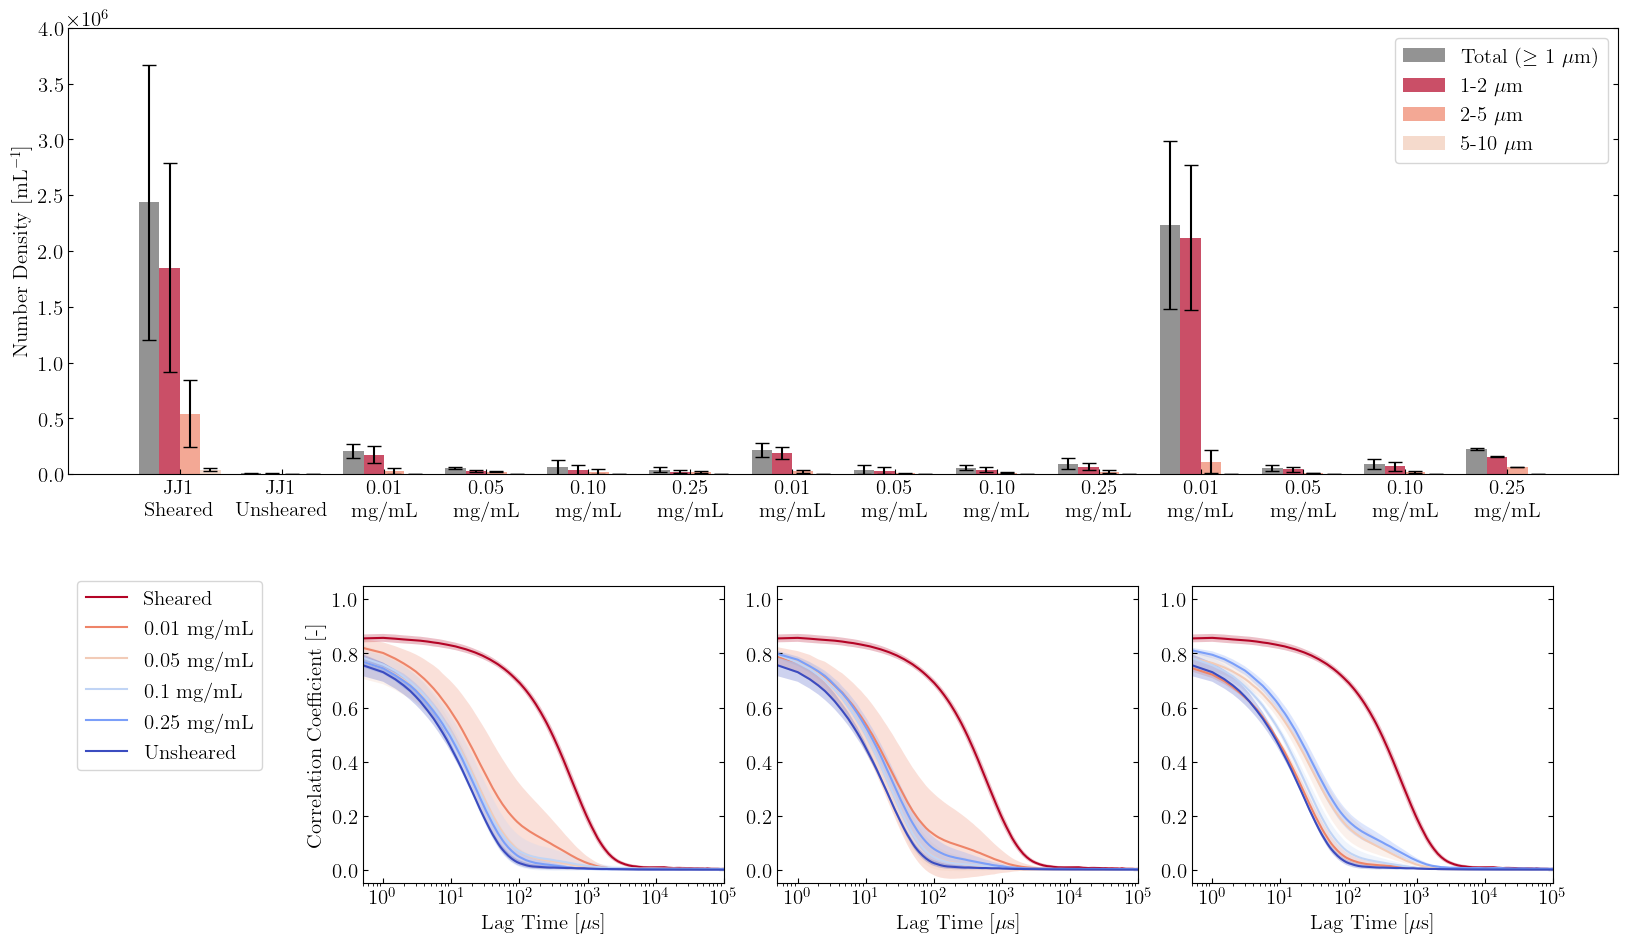

In [40]:
jp.plotSurfPub(corrData, intData, countData, 'bla', cmap, font, 'PM')

#### Surfactants, Steel ↓ 

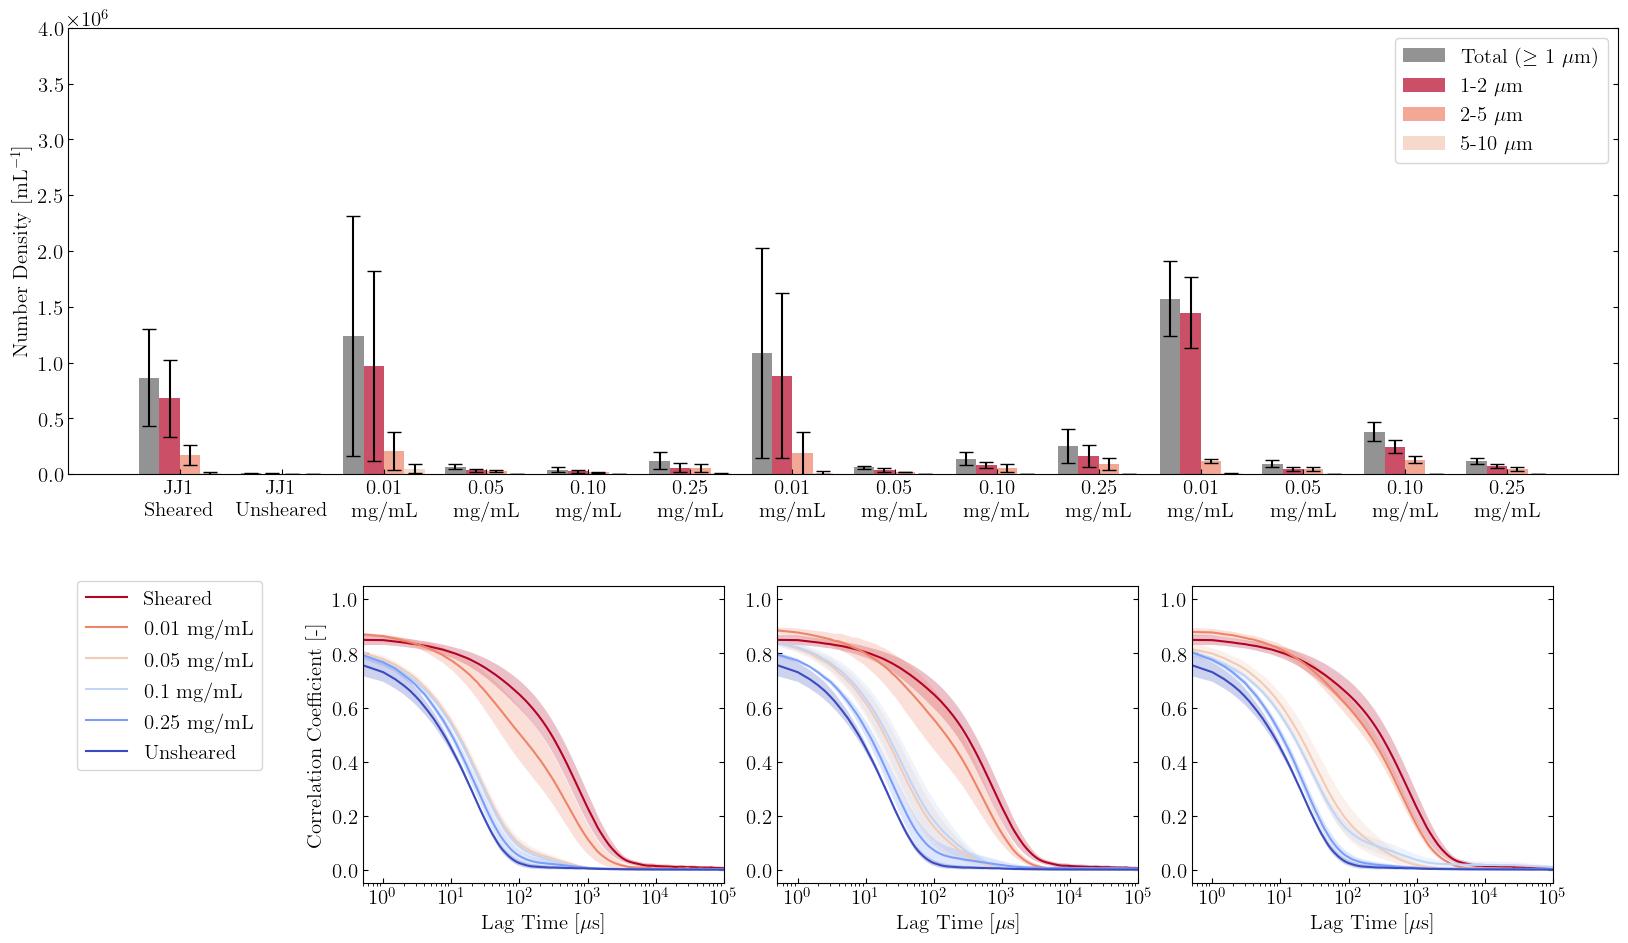

In [41]:
jp.plotSurfPub(corrData, intData, countData, 'bla', cmap, font, 'ST')

#### Concentrations, PMMA ↓  

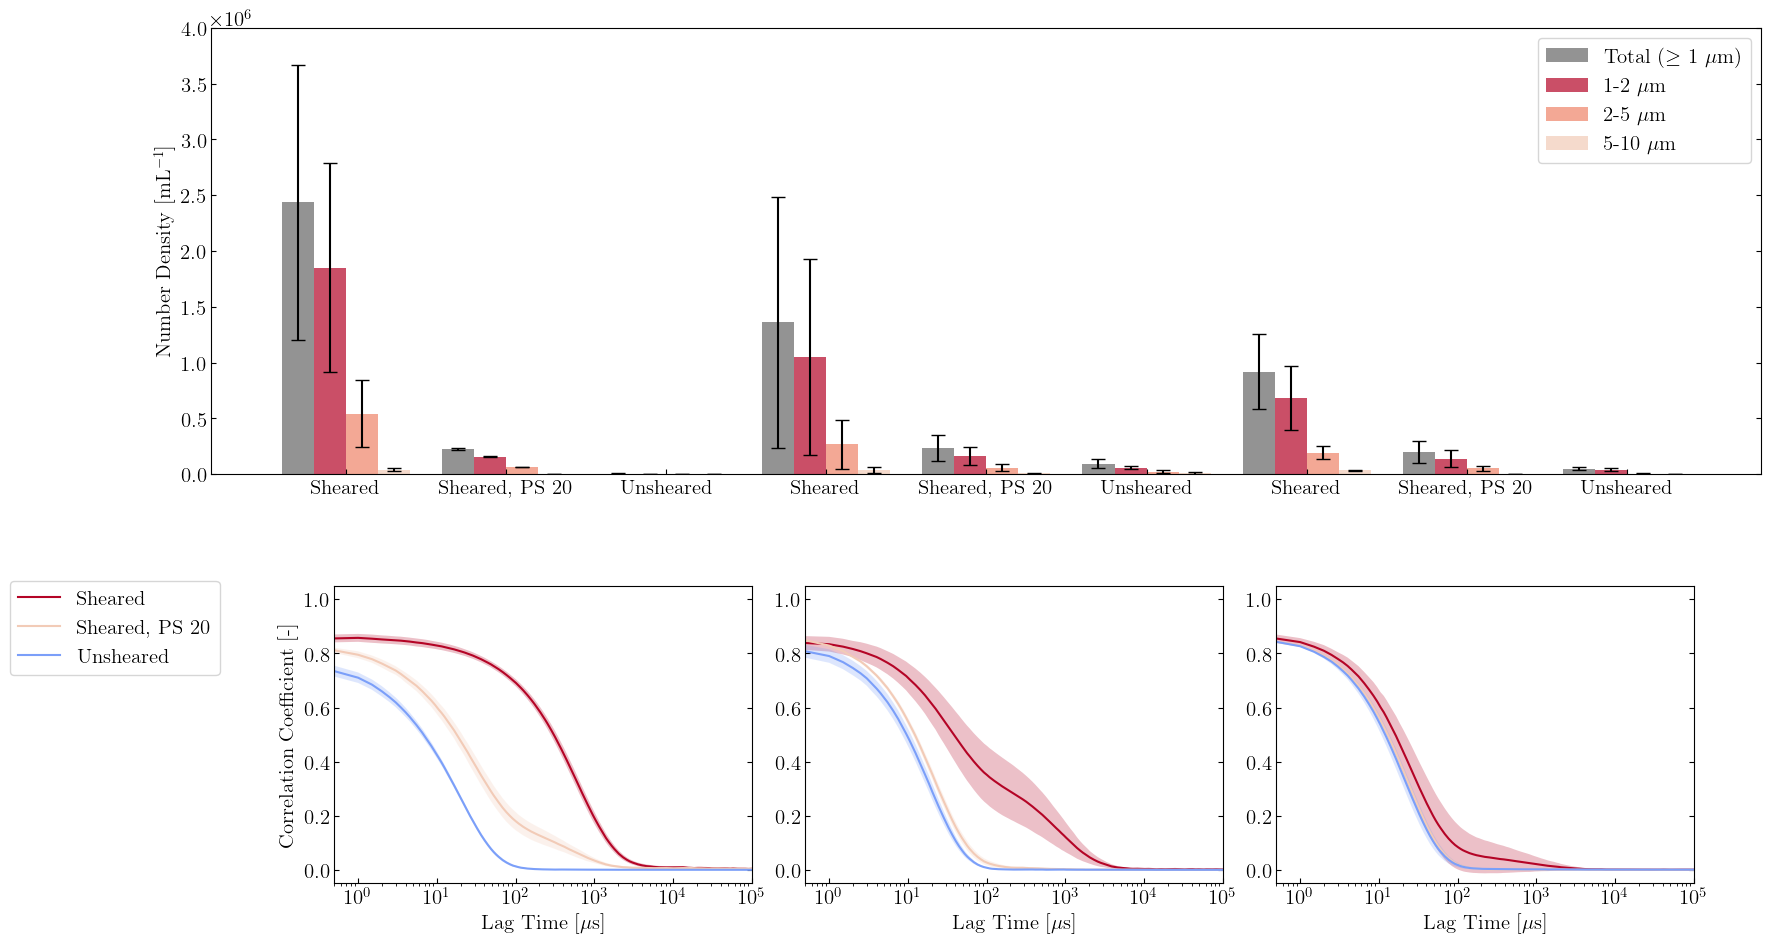

In [42]:
jp.plotConcPub(corrData, intData, countData, 'bla', cmap, font, 'PM')

#### Concentrations, Steel ↓ 

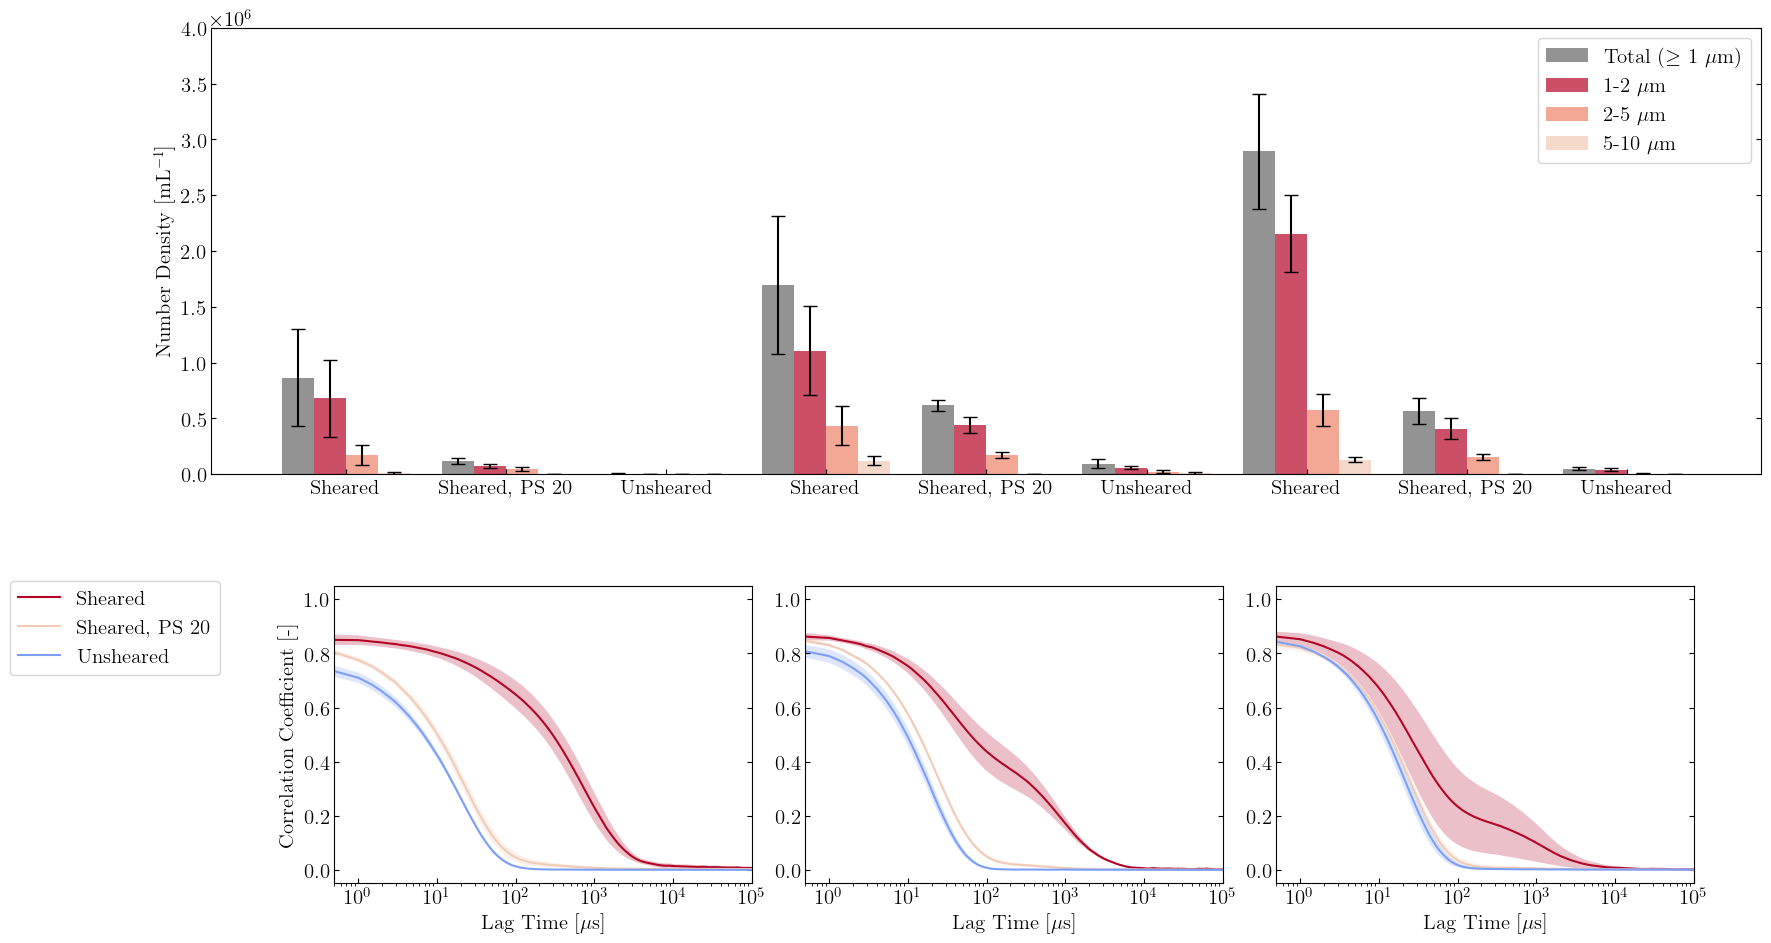

In [43]:
jp.plotConcPub(corrData, intData, countData, 'bla', cmap, font, 'ST')

#### Influence of Air ↓ 

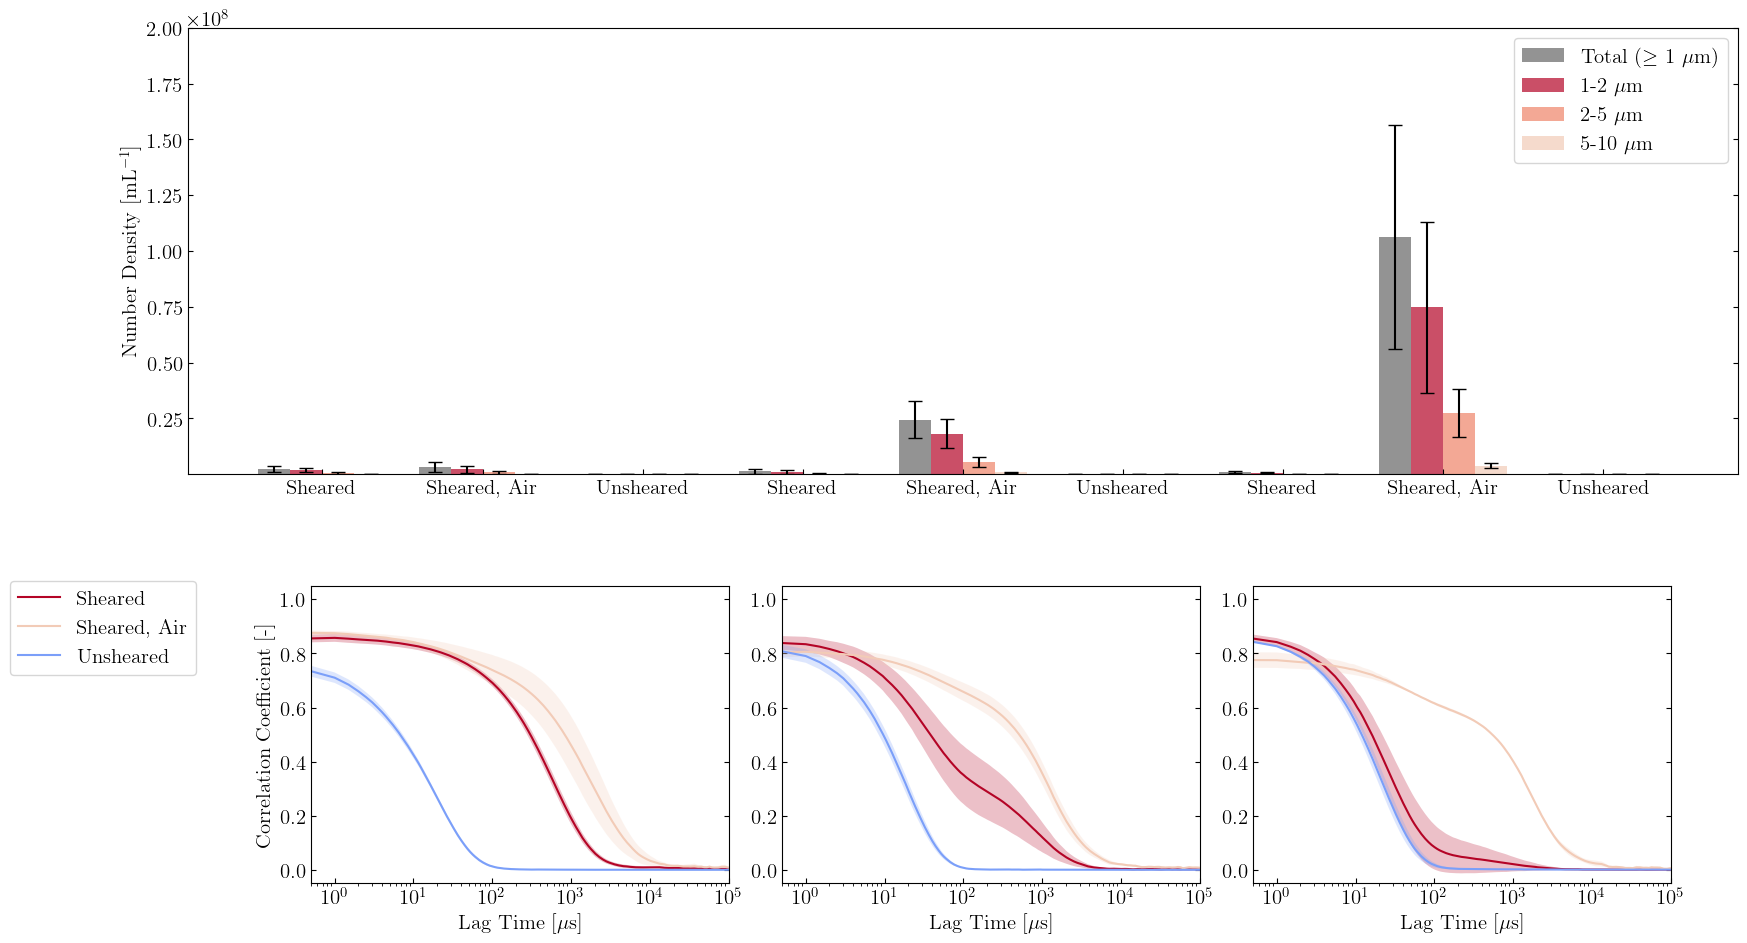

In [44]:
jp.plotAirPub(corrData, intData, countData, 'bla', cmap, font, 'PM')

#### PS 20 + Concentrations, PMMA ↓ 

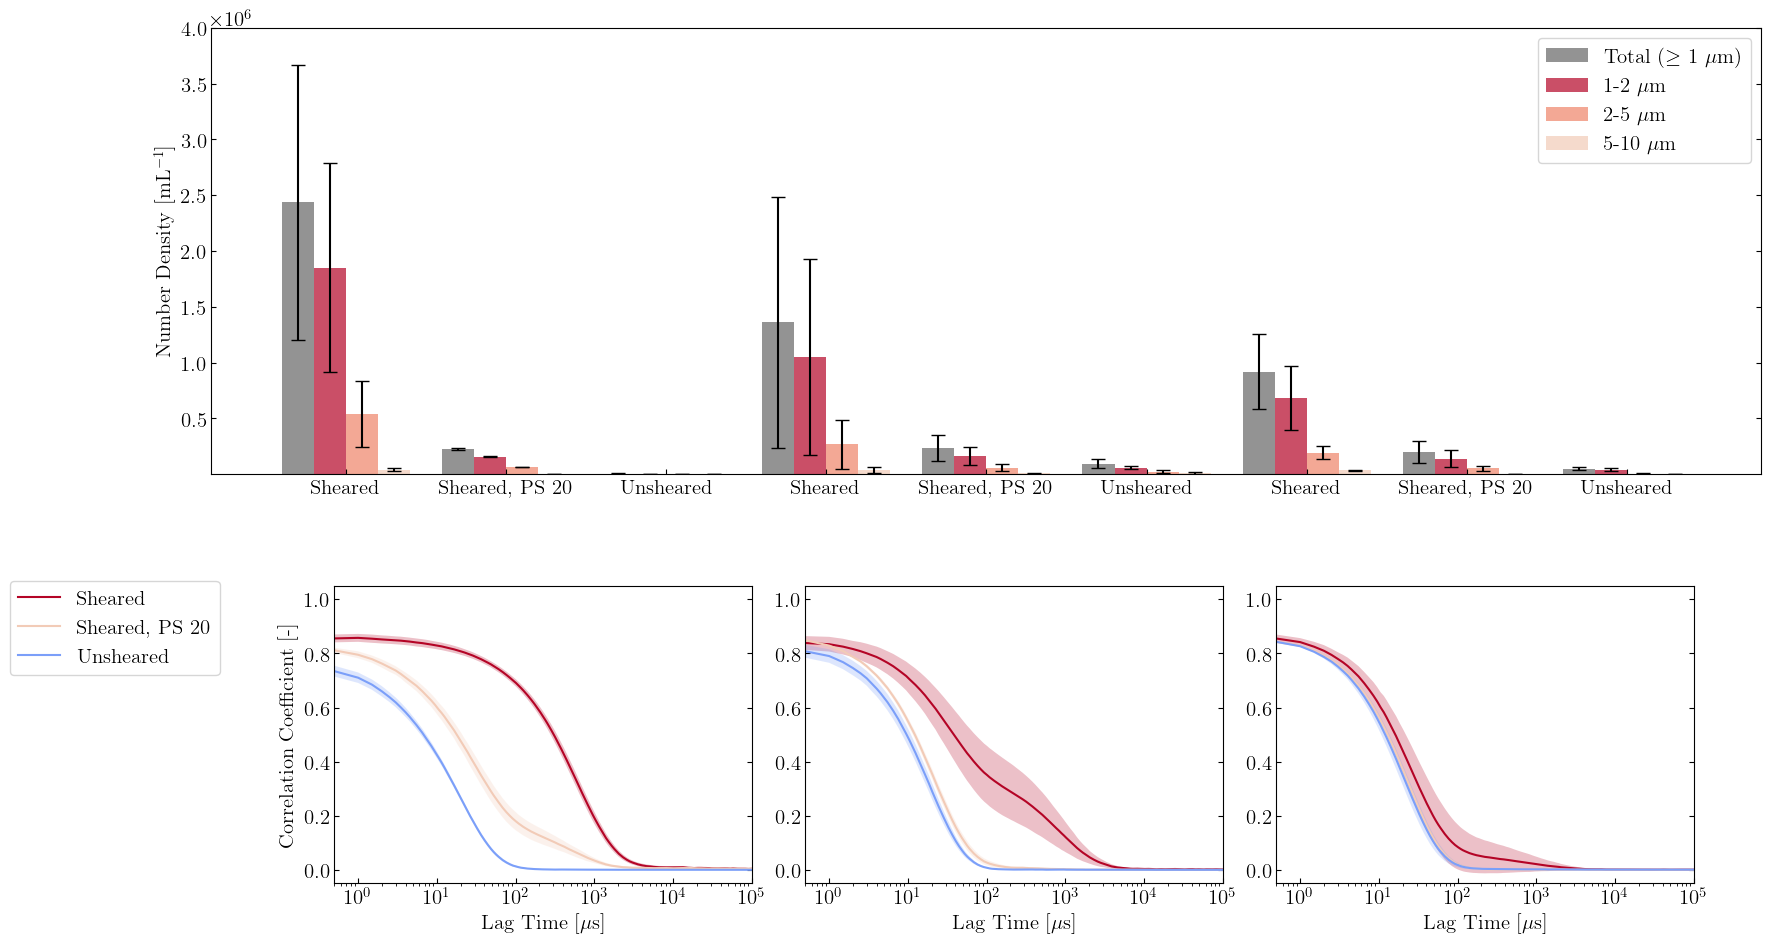

In [45]:
jp.plotPS2ConcPub(corrData, intData, countData, 'bla', cmap, font, 'PM')

#### PS 20 + Concentrations, Steel ↓ 

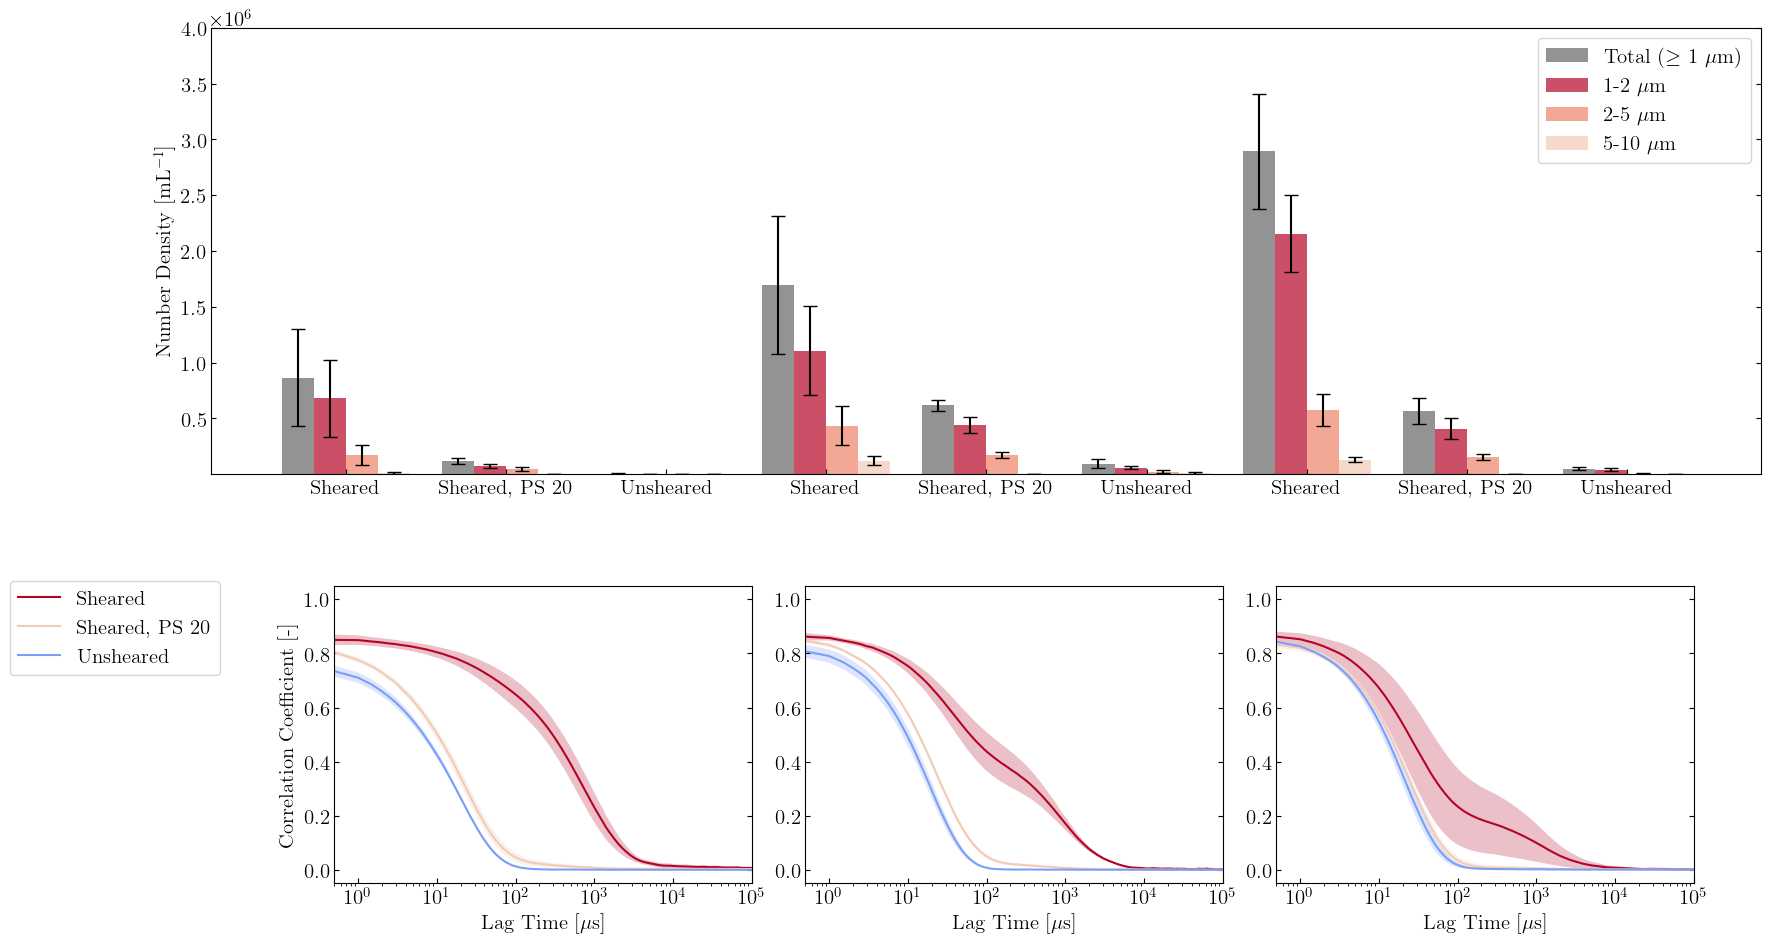

In [46]:
jp.plotPS2ConcPub(corrData, intData, countData, 'bla', cmap, font, 'ST')

## 3.3 Plot Placement

### 3.3.1 Append Overview Plots to Powerpoint Presentation

In [47]:
# Load presentation template and set slide layout
prs = Presentation(os.path.join('02_Plots', '00_Summary', 'Results.pptx'))
layout = prs.slide_layouts[6] 

# Side margins on the PP slides
leftMargin = Inches(3)
topMargin = Inches(2)

# Image size on the PP slides
imWidth = Inches(6)
imHeight = Inches(5)

# Set title and subtitle
title = "All Plots"
subtitle = "Overview Plots"

# Get sorted list of all plot paths
plotListPub = sorted(glob.glob(os.path.join('.', '02_Plots', '00_Summary', '00_Edit', '02_PNG', '*.png')))
plotListDLS = sorted(glob.glob(os.path.join('.', '02_Plots', '01_DLS', '01_Overview', '02_PNG', '*.png')))
plotListLinMDI = sorted(glob.glob(os.path.join('.', '02_Plots', '02_MDI', '01_Overview', '01_Linear' , '02_PNG', '*.png')))
plotListLogMDI = sorted(glob.glob(os.path.join('.', '02_Plots', '02_MDI', '01_Overview', '02_Log' , '02_PNG', '*.png')))

# Initialize empty sets of basenames
plotSetPub = set()
plotSetDLS = set()
plotSetLinMDI = set()
plotSetLogMDI = set()

# Convert lists to sets of basenames
for plotPub, plotDLS, plotLinMDI, plotLogMDI in zip_longest(plotListPub, plotListDLS, plotListLinMDI, plotListLogMDI):
    
    if plotPub:
        plotSetPub.add(os.path.basename(plotPub))
    if plotDLS:
        plotSetDLS.add(os.path.basename(plotDLS))
    if plotLinMDI:
        plotSetLinMDI.add(os.path.basename(plotLinMDI))
    if plotLogMDI:
        plotSetLogMDI.add(os.path.basename(plotLogMDI))
        
# Loop over all plots and insert them into PP presentation
for plot in plotListPub:
    slide = jp.addSlide(prs, plot, 0, layout, title, subtitle, leftMargin, topMargin, 1.5*imWidth, imHeight, 0)

    txBox = slide.shapes.add_textbox(Inches(6), 0.6*Inches(2), width=Inches(5.5), height=Inches(5.5))
    tf = txBox.text_frame
    tf.text = plot[37:]
    
for plot in plotListDLS:

    if plot[37:] == 'JJ1_01mg_Mat.png':
        _ = jp.addSlide(prs, plot, 0, layout, title, subtitle, leftMargin, topMargin, 1.6*imWidth, imHeight, 0)
    else:
        _ = jp.addSlide(prs, plot, 0, layout, title, subtitle, leftMargin, topMargin, imWidth, imHeight, 0)
    
    baseName = os.path.basename(plot)
    
    if baseName in plotSetLinMDI:
        
        plot1 = os.path.join('.', '02_Plots', '02_MDI', '01_Overview', '01_Linear' , '02_PNG', baseName)
        plot2 = os.path.join('.', '02_Plots', '02_MDI', '01_Overview', '01_Linear' , '02_PNG', baseName[:-4]+'_rmBin.png')
        
        _ = jp.addSlide(prs, plot1, plot2, layout, title, subtitle, leftMargin, topMargin, imWidth, imHeight, 0)

    if baseName in plotSetLogMDI:
        
        plot3 = os.path.join('.', '02_Plots', '02_MDI', '01_Overview', '02_Log' , '02_PNG', baseName)
        
        _ = jp.addSlide(prs, plot3, 0, layout, title, subtitle, leftMargin, topMargin, imWidth, imHeight, 0)

# Save presentation
prs.save(os.path.join('02_Plots', '00_Summary', 'OverviewResults.pptx'))

print('All overview plots have been inserted into a powerpoint presentation, which has been saved as OverviewResults.pptx')

All overview plots have been inserted into a powerpoint presentation, which has been saved as OverviewResults.pptx


### 3.3.2 Append Individual Plots to Powerpoint Presentation

In [48]:
prs = Presentation(os.path.join('02_Plots', '00_Summary', 'Results.pptx'))
layout = prs.slide_layouts[6] 

# Side margins on the PP slides
leftMargin = Inches(2)
topMargin = Inches(2)

# Image size on the PP slides
imWidth = Inches(6)
imHeight = Inches(4.5)

# Set title and subtitle
title = "All Plots"
subtitle = "Individual Plots"

plotListColl = []
plotListAvg = []

# Get sorted list of all plot paths
plotListDLS = sorted(glob.glob(os.path.join('.', '02_Plots', '01_DLS', '03_Collection', '02_PNG', '*.png')))
plotListLinMDI = sorted(glob.glob(os.path.join('.', '02_Plots', '02_MDI', '03_Collection', '01_Linear' , '02_PNG', '*.png')))
plotListLogMDI = sorted(glob.glob(os.path.join('.', '02_Plots', '02_MDI', '03_Collection', '02_Log' , '02_PNG', '*.png')))

# Initialize empty sets of basenames
plotSetDLS = set()
plotSetLinMDI = set()
plotSetLogMDI = set()

# Convert lists to sets of basenames
for plotDLS, plotLinMDI, plotLogMDI in zip_longest(plotListDLS, plotListLinMDI, plotListLogMDI):
    
    if plotDLS:
        plotSetDLS.add(os.path.basename(plotDLS))
    if plotLinMDI:
        plotSetLinMDI.add(os.path.basename(plotLinMDI))
    if plotLogMDI:
        plotSetLogMDI.add(os.path.basename(plotLogMDI))

# Loop over all plots and insert them into PP presentation
for plot in plotListDLS:

    _ = jp.addSlide(prs, plot, 0, layout, title, subtitle, leftMargin, topMargin, imWidth, imHeight, 1)
    
    baseName = os.path.basename(plot)
    
    if baseName in plotSetLinMDI:
        
        plot1 = os.path.join('.', '02_Plots', '02_MDI', '03_Collection', '01_Linear' , '02_PNG', baseName)
        plot2 = os.path.join('.', '02_Plots', '02_MDI', '03_Collection', '01_Linear' , '02_PNG', baseName[:-9]+'_rmBin_Coll.png')
        
        _ = jp.addSlide(prs, plot1, plot2, layout, title, subtitle, leftMargin, topMargin, imWidth, 0.75*imHeight, 1)

    if baseName in plotSetLogMDI:
        
        plot3 = os.path.join('.', '02_Plots', '02_MDI', '03_Collection', '02_Log' , '02_PNG', baseName)
        
        _ = jp.addSlide(prs, plot3, 0, layout, title, subtitle, 2*leftMargin, topMargin, imWidth, 0.9*imHeight, 1)

# Save presentation
prs.save(os.path.join('02_Plots', '00_Summary', 'IndividualResults.pptx'))

print('All individual plots have been inserted into a powerpoint presentation, which has been saved as IndividualResults.pptx')

All individual plots have been inserted into a powerpoint presentation, which has been saved as IndividualResults.pptx


In [49]:
input('Everything is done! Now go and take a break :-)  ')

Everything is done! Now go and take a break :-)  


''